In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
# Read CSV
flu_cov_data = pd.read_csv("NCHSData48.csv")

In [3]:
flu_cov_data

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza (P&I),"Percent of Deaths Due to Pneumonia, Influenza or COVID-19 (PIC)",Expected,Threshold,All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,"Pneumonia, Influenza or COVID-19 Deaths (PIC)"
0,2013,40,6.617957,6.617957,6.36132,6.77011,47492,3140,3,0,3143
1,2013,41,6.652714,6.652714,6.45326,6.86185,47304,3135,12,0,3147
2,2013,42,6.779127,6.779127,6.55439,6.96279,47602,3216,11,0,3227
3,2013,43,6.622544,6.622544,6.66322,7.07142,47746,3151,11,0,3162
4,2013,44,6.730631,6.730631,6.77811,7.18613,48777,3271,12,0,3283
...,...,...,...,...,...,...,...,...,...,...,...
369,2020,44,9.458449,15.183620,5.66748,5.97130,57483,5419,18,6156,8728
370,2020,45,10.228830,16.805974,5.76977,6.07359,58384,5951,21,7228,9812
371,2020,46,10.965320,18.415250,5.87518,6.17900,54873,6002,15,7707,10105
372,2020,47,11.096260,18.562551,5.98220,6.28602,42645,4717,15,6024,7916


In [4]:
# Remove Unnecessary Column Data
flu_cov_data = flu_cov_data.drop(columns=['Expected', 'Threshold'])
flu_cov_data

,Year,Week,Percent of Deaths Due to Pneumonia and Influenza (P&I),"Percent of Deaths Due to Pneumonia, Influenza or COVID-19 (PIC)",All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,"Pneumonia, Influenza or COVID-19 Deaths (PIC)"
0,2013,40,6.617957,6.617957,47492,3140,3,0,3143
1,2013,41,6.652714,6.652714,47304,3135,12,0,3147
2,2013,42,6.779127,6.779127,47602,3216,11,0,3227
3,2013,43,6.622544,6.622544,47746,3151,11,0,3162
4,2013,44,6.730631,6.730631,48777,3271,12,0,3283
...,...,...,...,...,...,...,...,...,...
369,2020,44,9.458449,15.183620,57483,5419,18,6156,8728
370,2020,45,10.228830,16.805974,58384,5951,21,7228,9812
371,2020,46,10.965320,18.415250,54873,6002,15,7707,10105
372,2020,47,11.096260,18.562551,42645,4717,15,6024,7916


In [5]:
# Rename Column Headers
flu_cov_data = flu_cov_data.rename(columns={"Percent of Deaths Due to Pneumonia and Influenza (P&I)": "% of Deaths (PI)", "Percent of Deaths Due to Pneumonia, Influenza or COVID-19 (PIC)": "% of Deaths (PIC)", "Pneumonia, Influenza or COVID-19 Deaths (PIC)": "Deaths (PIC)"})
flu_cov_data

,Year,Week,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
0,2013,40,6.617957,6.617957,47492,3140,3,0,3143
1,2013,41,6.652714,6.652714,47304,3135,12,0,3147
2,2013,42,6.779127,6.779127,47602,3216,11,0,3227
3,2013,43,6.622544,6.622544,47746,3151,11,0,3162
4,2013,44,6.730631,6.730631,48777,3271,12,0,3283
...,...,...,...,...,...,...,...,...,...
369,2020,44,9.458449,15.183620,57483,5419,18,6156,8728
370,2020,45,10.228830,16.805974,58384,5951,21,7228,9812
371,2020,46,10.965320,18.415250,54873,6002,15,7707,10105
372,2020,47,11.096260,18.562551,42645,4717,15,6024,7916


In [6]:
# Remove Unnecessary Row Data
flu_cov_data = flu_cov_data.drop(flu_cov_data[flu_cov_data['Year']==2013].index)
flu_cov_data = flu_cov_data.drop(flu_cov_data[flu_cov_data['Year']==2014].index)
flu_cov_data = flu_cov_data.drop(flu_cov_data[(flu_cov_data['Year']==2015) & (flu_cov_data['Week']<=45)].index)
flu_cov_clean = flu_cov_data.drop(flu_cov_data[(flu_cov_data['Year']==2020) & (flu_cov_data['Week']>45)].index)
flu_cov_clean

,Year,Week,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
111,2015,46,6.517213,6.517213,51387,3336,13,0,3349
112,2015,47,6.520041,6.520041,51196,3324,14,0,3338
113,2015,48,6.690899,6.690899,51996,3457,22,0,3479
114,2015,49,6.624841,6.624841,53556,3528,20,0,3548
115,2015,50,6.708846,6.708846,51842,3452,26,0,3478
...,...,...,...,...,...,...,...,...,...
366,2020,41,8.285680,12.164924,58233,4814,11,4451,7084
367,2020,42,8.559370,12.961786,56628,4832,15,4763,7340
368,2020,43,9.000486,14.117831,57608,5169,16,5459,8133
369,2020,44,9.458449,15.183620,57483,5419,18,6156,8728


In [7]:
# Create Desired Annual Dataframes

# 2016 Dataframe
data_2016 = flu_cov_clean[(flu_cov_clean['Year']==2015) & (flu_cov_clean['Week']>45)]
data_2016_add = flu_cov_clean[(flu_cov_clean['Year']==2016) & (flu_cov_clean['Week']<=45)]
data_2016 = data_2016.append(data_2016_add)
# 2017 Dataframe
data_2017 = flu_cov_clean[(flu_cov_clean['Year']==2016) & (flu_cov_clean['Week']>45)]
data_2017_add = flu_cov_clean[(flu_cov_clean['Year']==2017) & (flu_cov_clean['Week']<=45)]
data_2017 = data_2017.append(data_2017_add)
# 2018 Dataframe
data_2018 = flu_cov_clean[(flu_cov_clean['Year']==2017) & (flu_cov_clean['Week']>45)]
data_2018_add = flu_cov_clean[(flu_cov_clean['Year']==2018) & (flu_cov_clean['Week']<=45)]
data_2018 = data_2018.append(data_2018_add)
# 2019 Dataframe
data_2019 = flu_cov_clean[(flu_cov_clean['Year']==2018) & (flu_cov_clean['Week']>45)]
data_2019_add = flu_cov_clean[(flu_cov_clean['Year']==2019) & (flu_cov_clean['Week']<=45)]
data_2019 = data_2019.append(data_2019_add)
# 2020 Dataframe
data_2020 = flu_cov_clean[(flu_cov_clean['Year']==2019) & (flu_cov_clean['Week']>45)]
data_2020_add = flu_cov_clean[(flu_cov_clean['Year']==2020) & (flu_cov_clean['Week']<=45)]
data_2020 = data_2020.append(data_2020_add)
# 2020 Dataframe (Covid-19 Timeframe)
cdata_2020 = flu_cov_clean[(flu_cov_clean['Year']==2020) & (flu_cov_clean['Week']<=45)]
cdata_2020 = cdata_2020.drop(cdata_2020[(cdata_2020['Year']==2020) & (cdata_2020['Week']<6)].index)

In [8]:
# Run Aggregate Analysis On Annual Dataframes

# 2016 Dataframe Aggregate Analysis
data_2016.agg({'% of Deaths (PI)' : ['mean', 'min', 'max'], 
               '% of Deaths (PIC)' : ['mean', 'min', 'max'],
               'All Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Pneumonia Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Influenza Deaths' : ['sum', 'mean', 'min', 'max'], 
               'COVID-19 Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Deaths (PIC)' : ['sum', 'mean', 'min', 'max']}
             )

,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
max,8.251625,8.251625,5.611200e+04,4278.000000,351.000000,0.0,4571.00
mean,6.661620,6.661620,5.200969e+04,3414.442308,66.307692,0.0,3480.75
min,5.625571,5.625571,4.927500e+04,2767.000000,2.000000,0.0,2772.00
sum,NaN,NaN,2.704504e+06,177551.000000,3448.000000,0.0,180999.00


In [9]:
# 2017 Dataframe Aggregate Analysis
data_2017.agg({'% of Deaths (PI)' : ['mean', 'min', 'max'], 
               '% of Deaths (PIC)' : ['mean', 'min', 'max'],
               'All Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Pneumonia Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Influenza Deaths' : ['sum', 'mean', 'min', 'max'], 
               'COVID-19 Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Deaths (PIC)' : ['sum', 'mean', 'min', 'max']}
             )

,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
max,8.533635,8.533635,6.097900e+04,4621.000000,605.000000,0.0,4994.000000
mean,6.624358,6.624358,5.374119e+04,3454.653846,135.230769,0.0,3589.884615
min,5.357073,5.357073,4.936100e+04,2689.000000,3.000000,0.0,2699.000000
sum,NaN,NaN,2.794542e+06,179642.000000,7032.000000,0.0,186674.000000


In [10]:
# 2018 Dataframe Aggregate Analysis
data_2018.agg({'% of Deaths (PI)' : ['mean', 'min', 'max'], 
               '% of Deaths (PIC)' : ['mean', 'min', 'max'],
               'All Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Pneumonia Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Influenza Deaths' : ['sum', 'mean', 'min', 'max'], 
               'COVID-19 Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Deaths (PIC)' : ['sum', 'mean', 'min', 'max']}
             )

,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
max,10.886816,10.886816,6.749500e+04,5583.000000,1626.000000,0.0,7119.000000
mean,6.739340,6.739340,5.458708e+04,3446.134615,299.480769,0.0,3745.615385
min,5.208354,5.208354,5.027400e+04,2617.000000,4.000000,0.0,2622.000000
sum,NaN,NaN,2.838528e+06,179199.000000,15573.000000,0.0,194772.000000


In [11]:
# 2019 Dataframe Aggregate Analysis
data_2019.agg({'% of Deaths (PI)' : ['mean', 'min', 'max'], 
               '% of Deaths (PIC)' : ['mean', 'min', 'max'],
               'All Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Pneumonia Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Influenza Deaths' : ['sum', 'mean', 'min', 'max'], 
               'COVID-19 Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Deaths (PIC)' : ['sum', 'mean', 'min', 'max']}
             )

,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
max,7.750747,7.750747,5.854600e+04,4099.000000,543.000000,0.0,4489.0
mean,6.146534,6.146534,5.455602e+04,3234.557692,138.442308,0.0,3373.0
min,4.901904,4.901904,5.102200e+04,2515.000000,5.000000,0.0,2531.0
sum,NaN,NaN,2.836913e+06,168197.000000,7199.000000,0.0,175396.0


In [12]:
# 2020 Dataframe Aggregate Analysis
data_2020.agg({'% of Deaths (PI)' : ['mean', 'min', 'max'], 
               '% of Deaths (PIC)' : ['mean', 'min', 'max'],
               'All Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Pneumonia Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Influenza Deaths' : ['sum', 'mean', 'min', 'max'], 
               'COVID-19 Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Deaths (PIC)' : ['sum', 'mean', 'min', 'max']}
             )

,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC)
max,15.786069,27.727196,7.882900e+04,11972.000000,654.000000,17071.000000,21226.000000
mean,8.871230,12.675531,6.081027e+04,5323.826923,180.019231,4533.557692,7951.596154
min,5.455613,5.455613,5.546500e+04,2999.000000,3.000000,0.000000,3065.000000
sum,NaN,NaN,3.162134e+06,276839.000000,9361.000000,235745.000000,413483.000000


In [13]:
# Line Graph Development

# Weeks 
weeks = data_2016["Week"].astype(str)

In [14]:
# All Deaths Data
all_2016 = data_2016["All Deaths"]
all_2017 = data_2017["All Deaths"]
all_2018 = data_2018["All Deaths"]
all_2019 = data_2019["All Deaths"]
all_2020 = data_2020["All Deaths"]

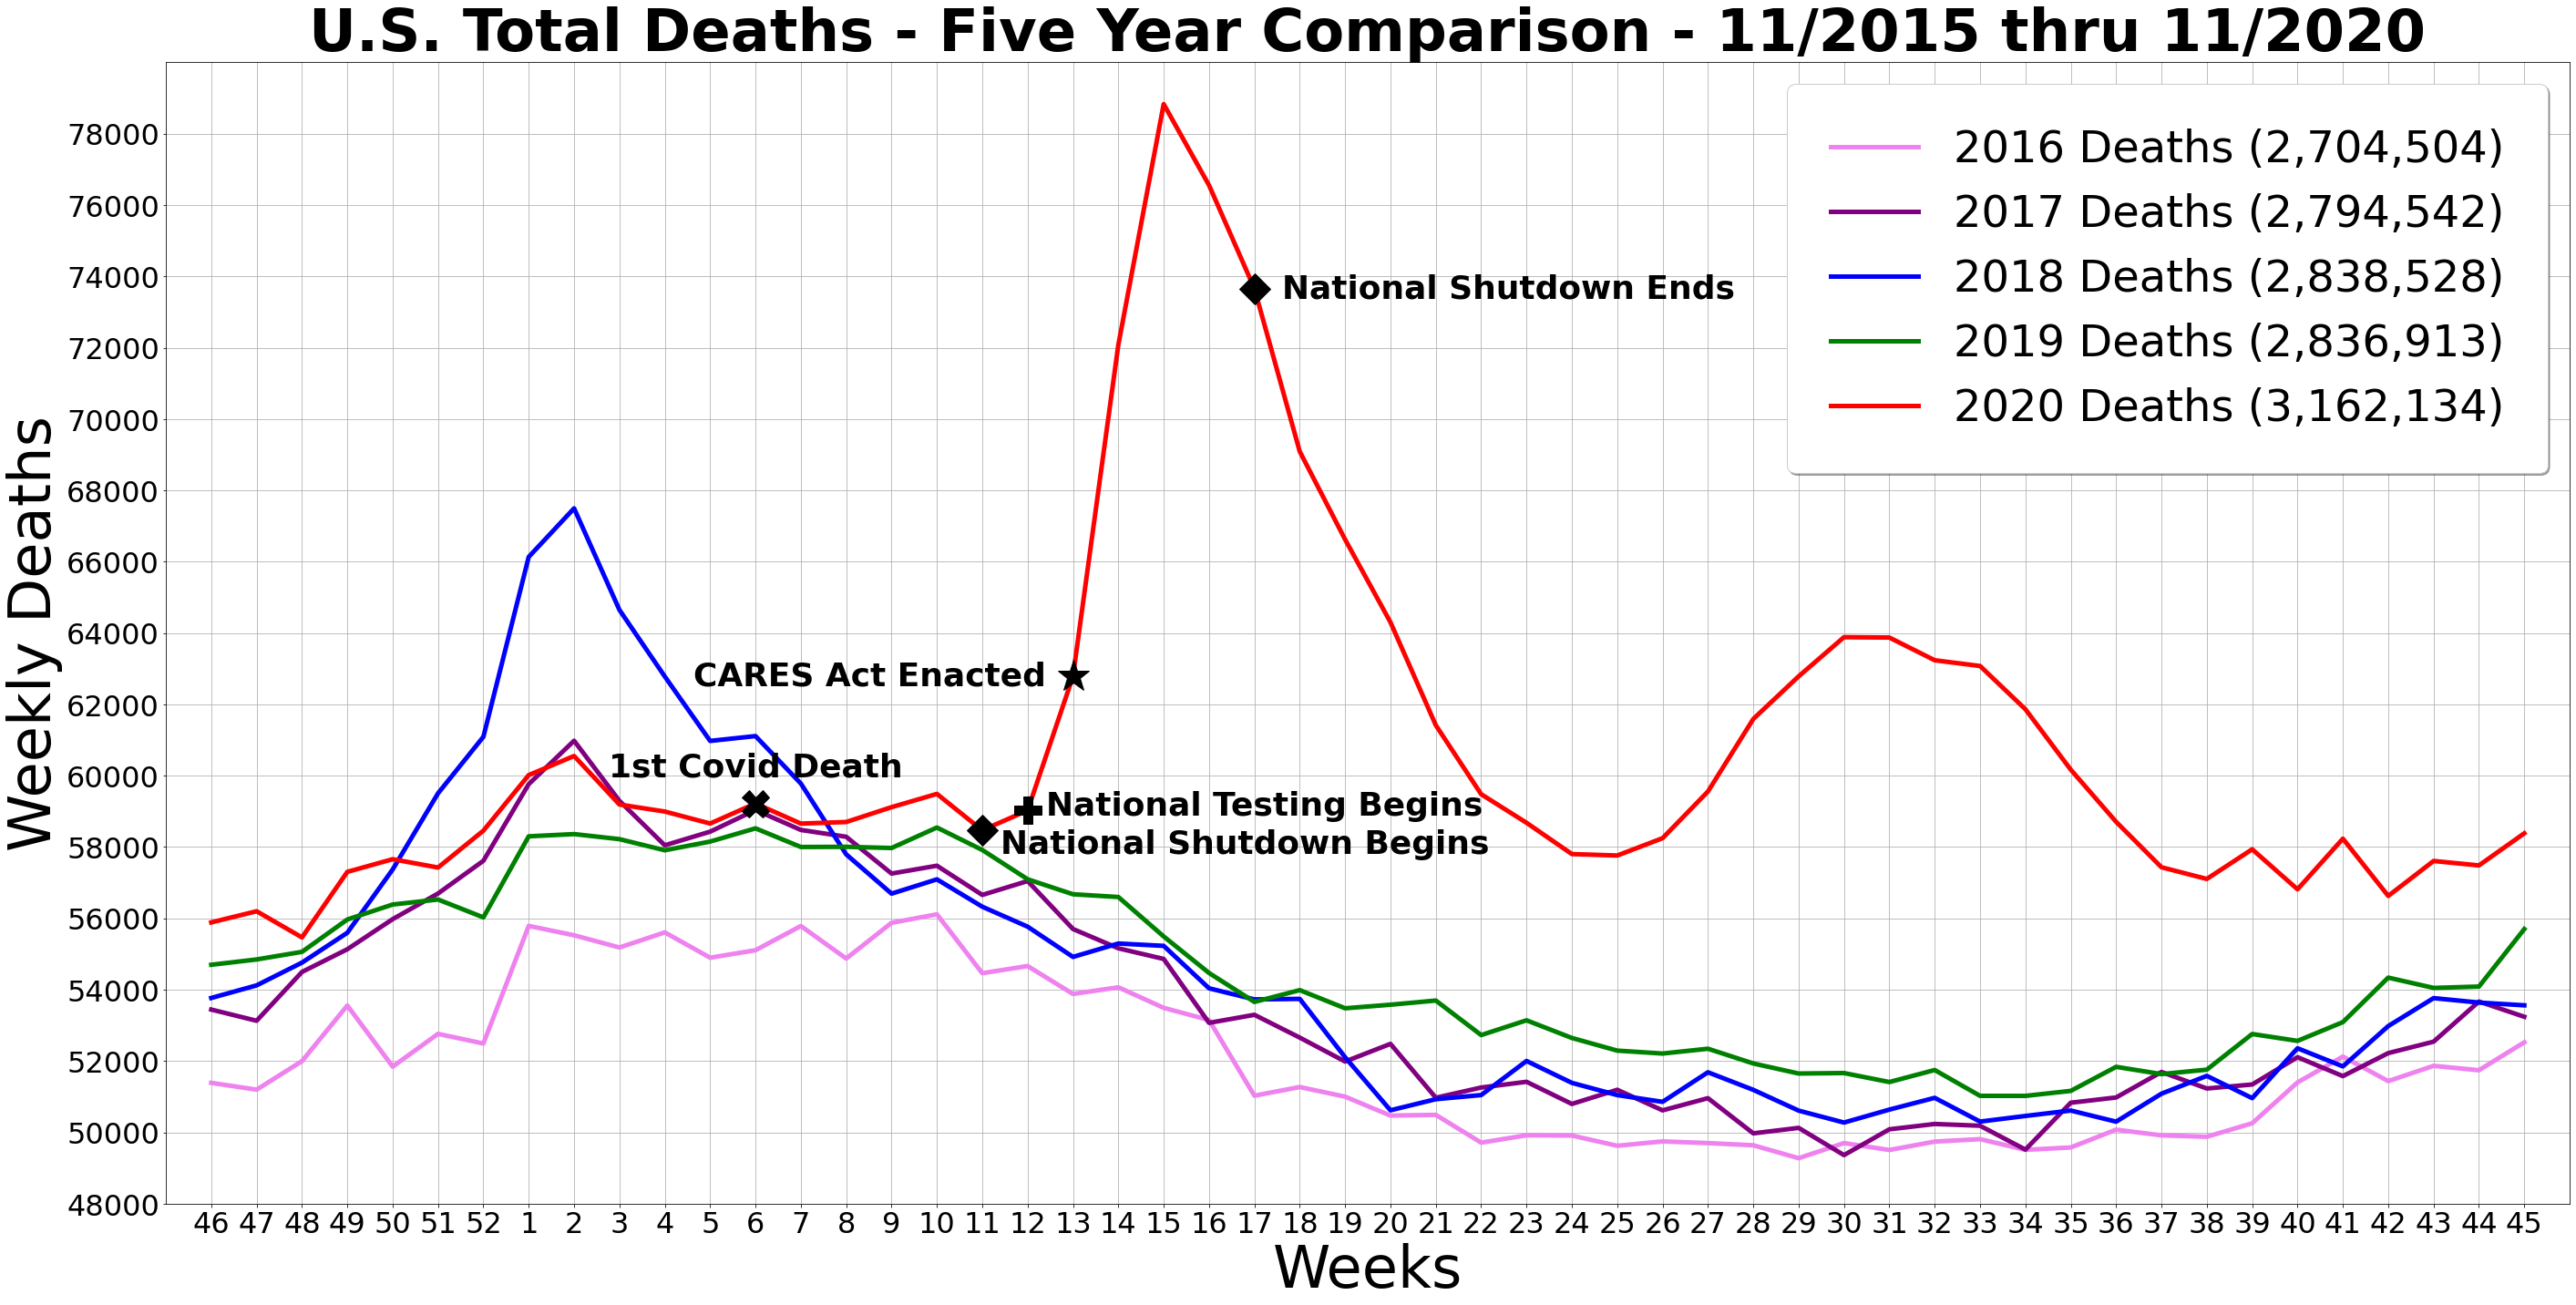

In [18]:
# Plot The 'All Deaths' Annual Data As A Line Chart
deaths_2016, = plt.plot(weeks, all_2016, color="violet", label="2016 Deaths (2,704,504)", linewidth=5)
deaths_2017, = plt.plot(weeks, all_2017, color="purple", label="2017 Deaths (2,794,542)", linewidth=5)
deaths_2018, = plt.plot(weeks, all_2018, color="blue", label="2018 Deaths (2,838,528)", linewidth=5)
deaths_2019, = plt.plot(weeks, all_2019, color="green", label="2019 Deaths (2,836,913)", linewidth=5)
deaths_2020, = plt.plot(weeks, all_2020, color="red", label="2020 Deaths (3,162,134)", linewidth=5)

# Create Chart Title
plt.title("U.S. Total Deaths - Five Year Comparison - 11/2015 thru 11/2020", fontsize=64, weight='bold')

# Create A Legend For The Chart
plt.legend(handles=[deaths_2016, deaths_2017, deaths_2018, deaths_2019, deaths_2020], loc="best", fontsize=48, fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Create labels For The X And Y Axis
plt.xlabel("Weeks", fontsize=64)
plt.ylabel("Weekly Deaths", fontsize=64)

# Set The Limits For The X And Y Axis
plt.xlim(-1,52)
plt.ylim(48000,80000)

# Set A Grid For The Chart
plt.grid()

# Adjust Fontsize And Scale For The X And Y Axis
plt.xticks(fontsize=32)
plt.yticks(np.arange(48000, 80000, step=2000), fontsize=32)

# Set Figure Chart Size
plt.rcParams["figure.figsize"] = [100,40]

# Add Covid-19 Starting Point To Chart
plt.annotate("1st Covid Death", (12, 59221), textcoords="offset points", xytext=(0,30), ha='center', fontsize=36, weight='bold')
plt.plot(12, 59221, marker="X", ms=30, color="k")

# Add National Shutdown Starting and Ending Point To Chart
plt.annotate("National Shutdown Begins", (17, 58468), textcoords="offset points", xytext=(20,-25), ha='left', fontsize=36, weight='bold')
plt.plot(17, 58468, marker="D", ms=24, color="k")
plt.annotate("National Shutdown Ends", (23, 73657), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(23, 73657, marker="D", ms=24, color="k")

# Add National Testing Starting To Chart
plt.annotate("National Testing Begins", (18, 59026), textcoords="offset points", xytext=(20,-5), ha='left', fontsize=36, weight='bold')
plt.plot(18, 59026, marker="P", ms=30, color="k")

# Add CARES Act Enactment To Chart
plt.annotate("CARES Act Enacted", (19, 62785), textcoords="offset points", xytext=(-30,-10), ha='right', fontsize=36, weight='bold')
plt.plot(19, 62785, marker="*", ms=36, color="k")

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Total Deaths.png")

# Show The Chart
plt.show()

In [19]:
# Pneumonia Data
pneu_2016 = data_2016["Pneumonia Deaths"]
pneu_2017 = data_2017["Pneumonia Deaths"]
pneu_2018 = data_2018["Pneumonia Deaths"]
pneu_2019 = data_2019["Pneumonia Deaths"]
pneu_2020 = data_2020["Pneumonia Deaths"]

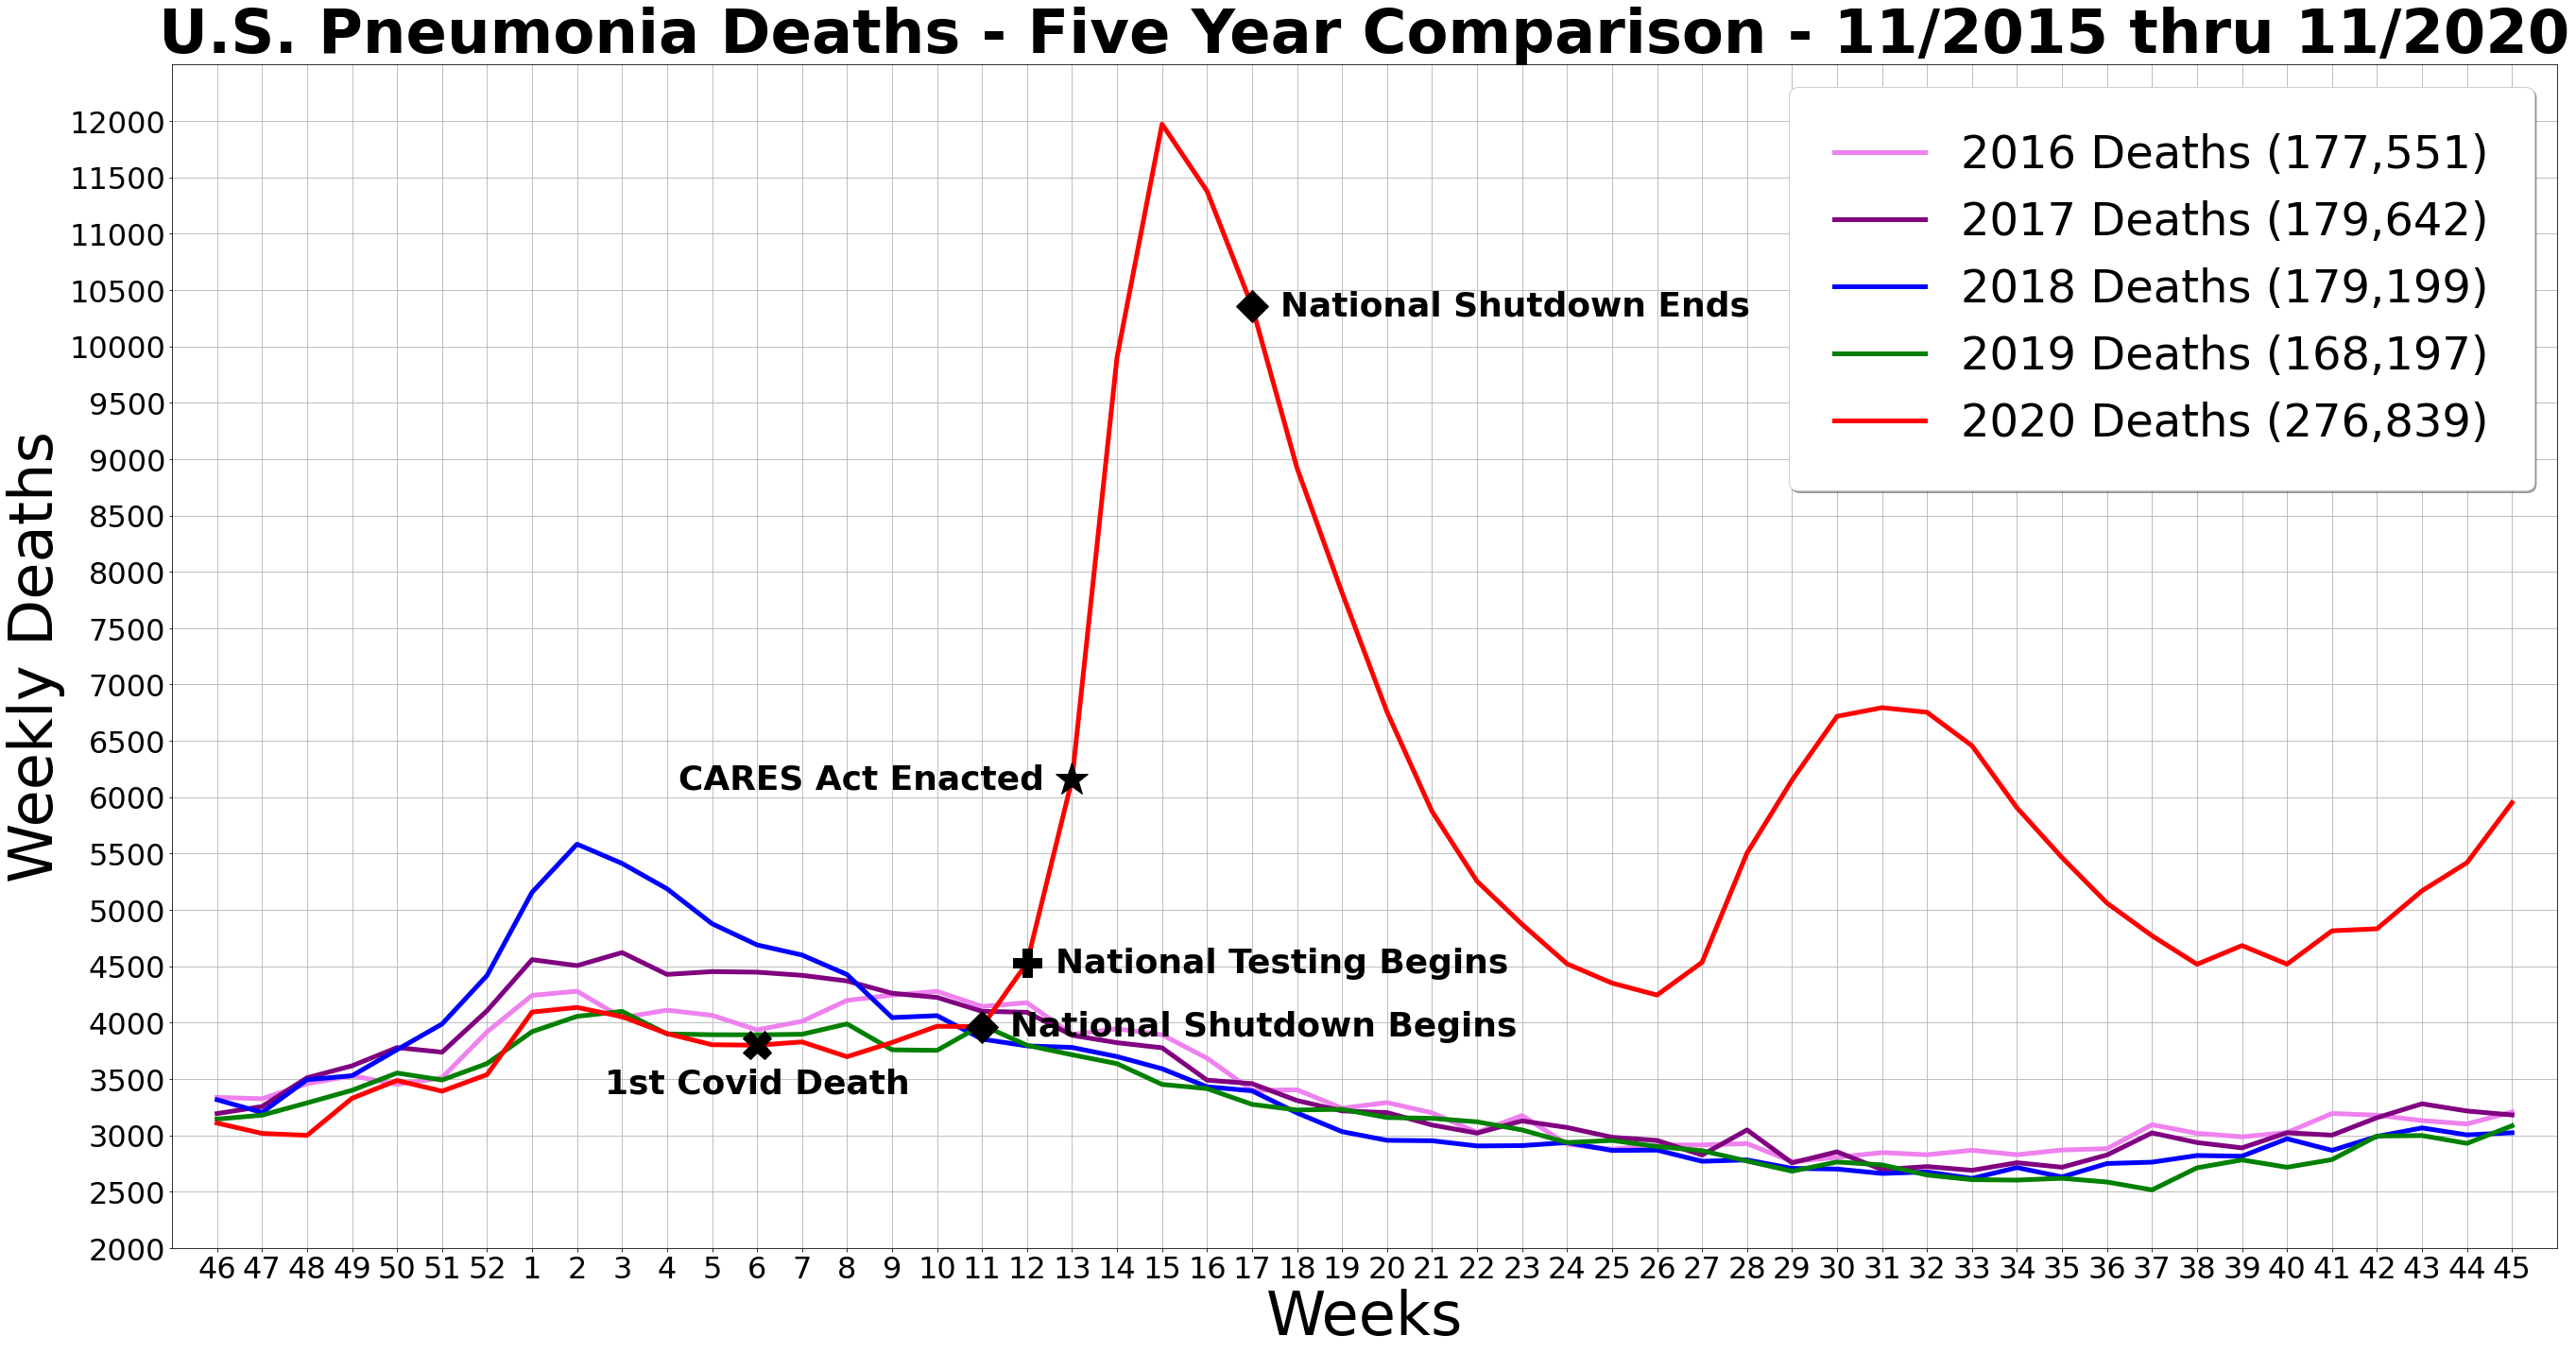

In [21]:
# Plot The 'Pneumonia Deaths' Annual Data As A Line Chart
deaths_2016, = plt.plot(weeks, pneu_2016, color="violet", label="2016 Deaths (177,551)", linewidth=5)
deaths_2017, = plt.plot(weeks, pneu_2017, color="purple", label="2017 Deaths (179,642)", linewidth=5)
deaths_2018, = plt.plot(weeks, pneu_2018, color="blue", label="2018 Deaths (179,199)", linewidth=5)
deaths_2019, = plt.plot(weeks, pneu_2019, color="green", label="2019 Deaths (168,197)", linewidth=5)
deaths_2020, = plt.plot(weeks, pneu_2020, color="red", label="2020 Deaths (276,839)", linewidth=5)

# Create Chart Title
plt.title("U.S. Pneumonia Deaths - Five Year Comparison - 11/2015 thru 11/2020", fontsize=64, weight='bold')

# Create A Legend For The Chart
plt.legend(handles=[deaths_2016, deaths_2017, deaths_2018, deaths_2019, deaths_2020], loc="best", fontsize=48, fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Create labels For The X And Y Axis
plt.xlabel("Weeks", fontsize=64)
plt.ylabel("Weekly Deaths", fontsize=64)

# Set The Limits For The X And Y Axis
plt.xlim(-1,52)
plt.ylim(2000,12500)

# Set A Grid For The Chart
plt.grid()

# Adjust Fontsize And Scale For The X And Y Axis
plt.xticks(fontsize=32)
plt.yticks(np.arange(2000, 12500, step=500), fontsize=32)

# Set Figure Chart Size
plt.rcParams["figure.figsize"] = [100,50]

# Add Covid-19 Starting Point To Chart
plt.annotate("1st Covid Death", (12, 3799), textcoords="offset points", xytext=(0,-50), ha='center', fontsize=36, weight='bold')
plt.plot(12, 3799, marker="X", ms=30, color="k")

# Add National Shutdown Starting and Ending Point To Chart
plt.annotate("National Shutdown Begins", (17, 3963), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(17, 3963, marker="D", ms=24, color="k")
plt.annotate("National Shutdown Ends", (23, 10356), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(23, 10356, marker="D", ms=24, color="k")

# Add National Testing Starting To Chart
plt.annotate("National Testing Begins", (18, 4530), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(18, 4530, marker="P", ms=30, color="k")

# Add CARES Act Enactment To Chart
plt.annotate("CARES Act Enacted", (19, 6156), textcoords="offset points", xytext=(-30,-10), ha='right', fontsize=36, weight='bold')
plt.plot(19, 6156, marker="*", ms=36, color="k")

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Pneumonia Deaths.png")

# Show The Chart
plt.show()

In [22]:
# Pneumonia Data
flu_2016 = data_2016["Influenza Deaths"]
flu_2017 = data_2017["Influenza Deaths"]
flu_2018 = data_2018["Influenza Deaths"]
flu_2019 = data_2019["Influenza Deaths"]
flu_2020 = data_2020["Influenza Deaths"]

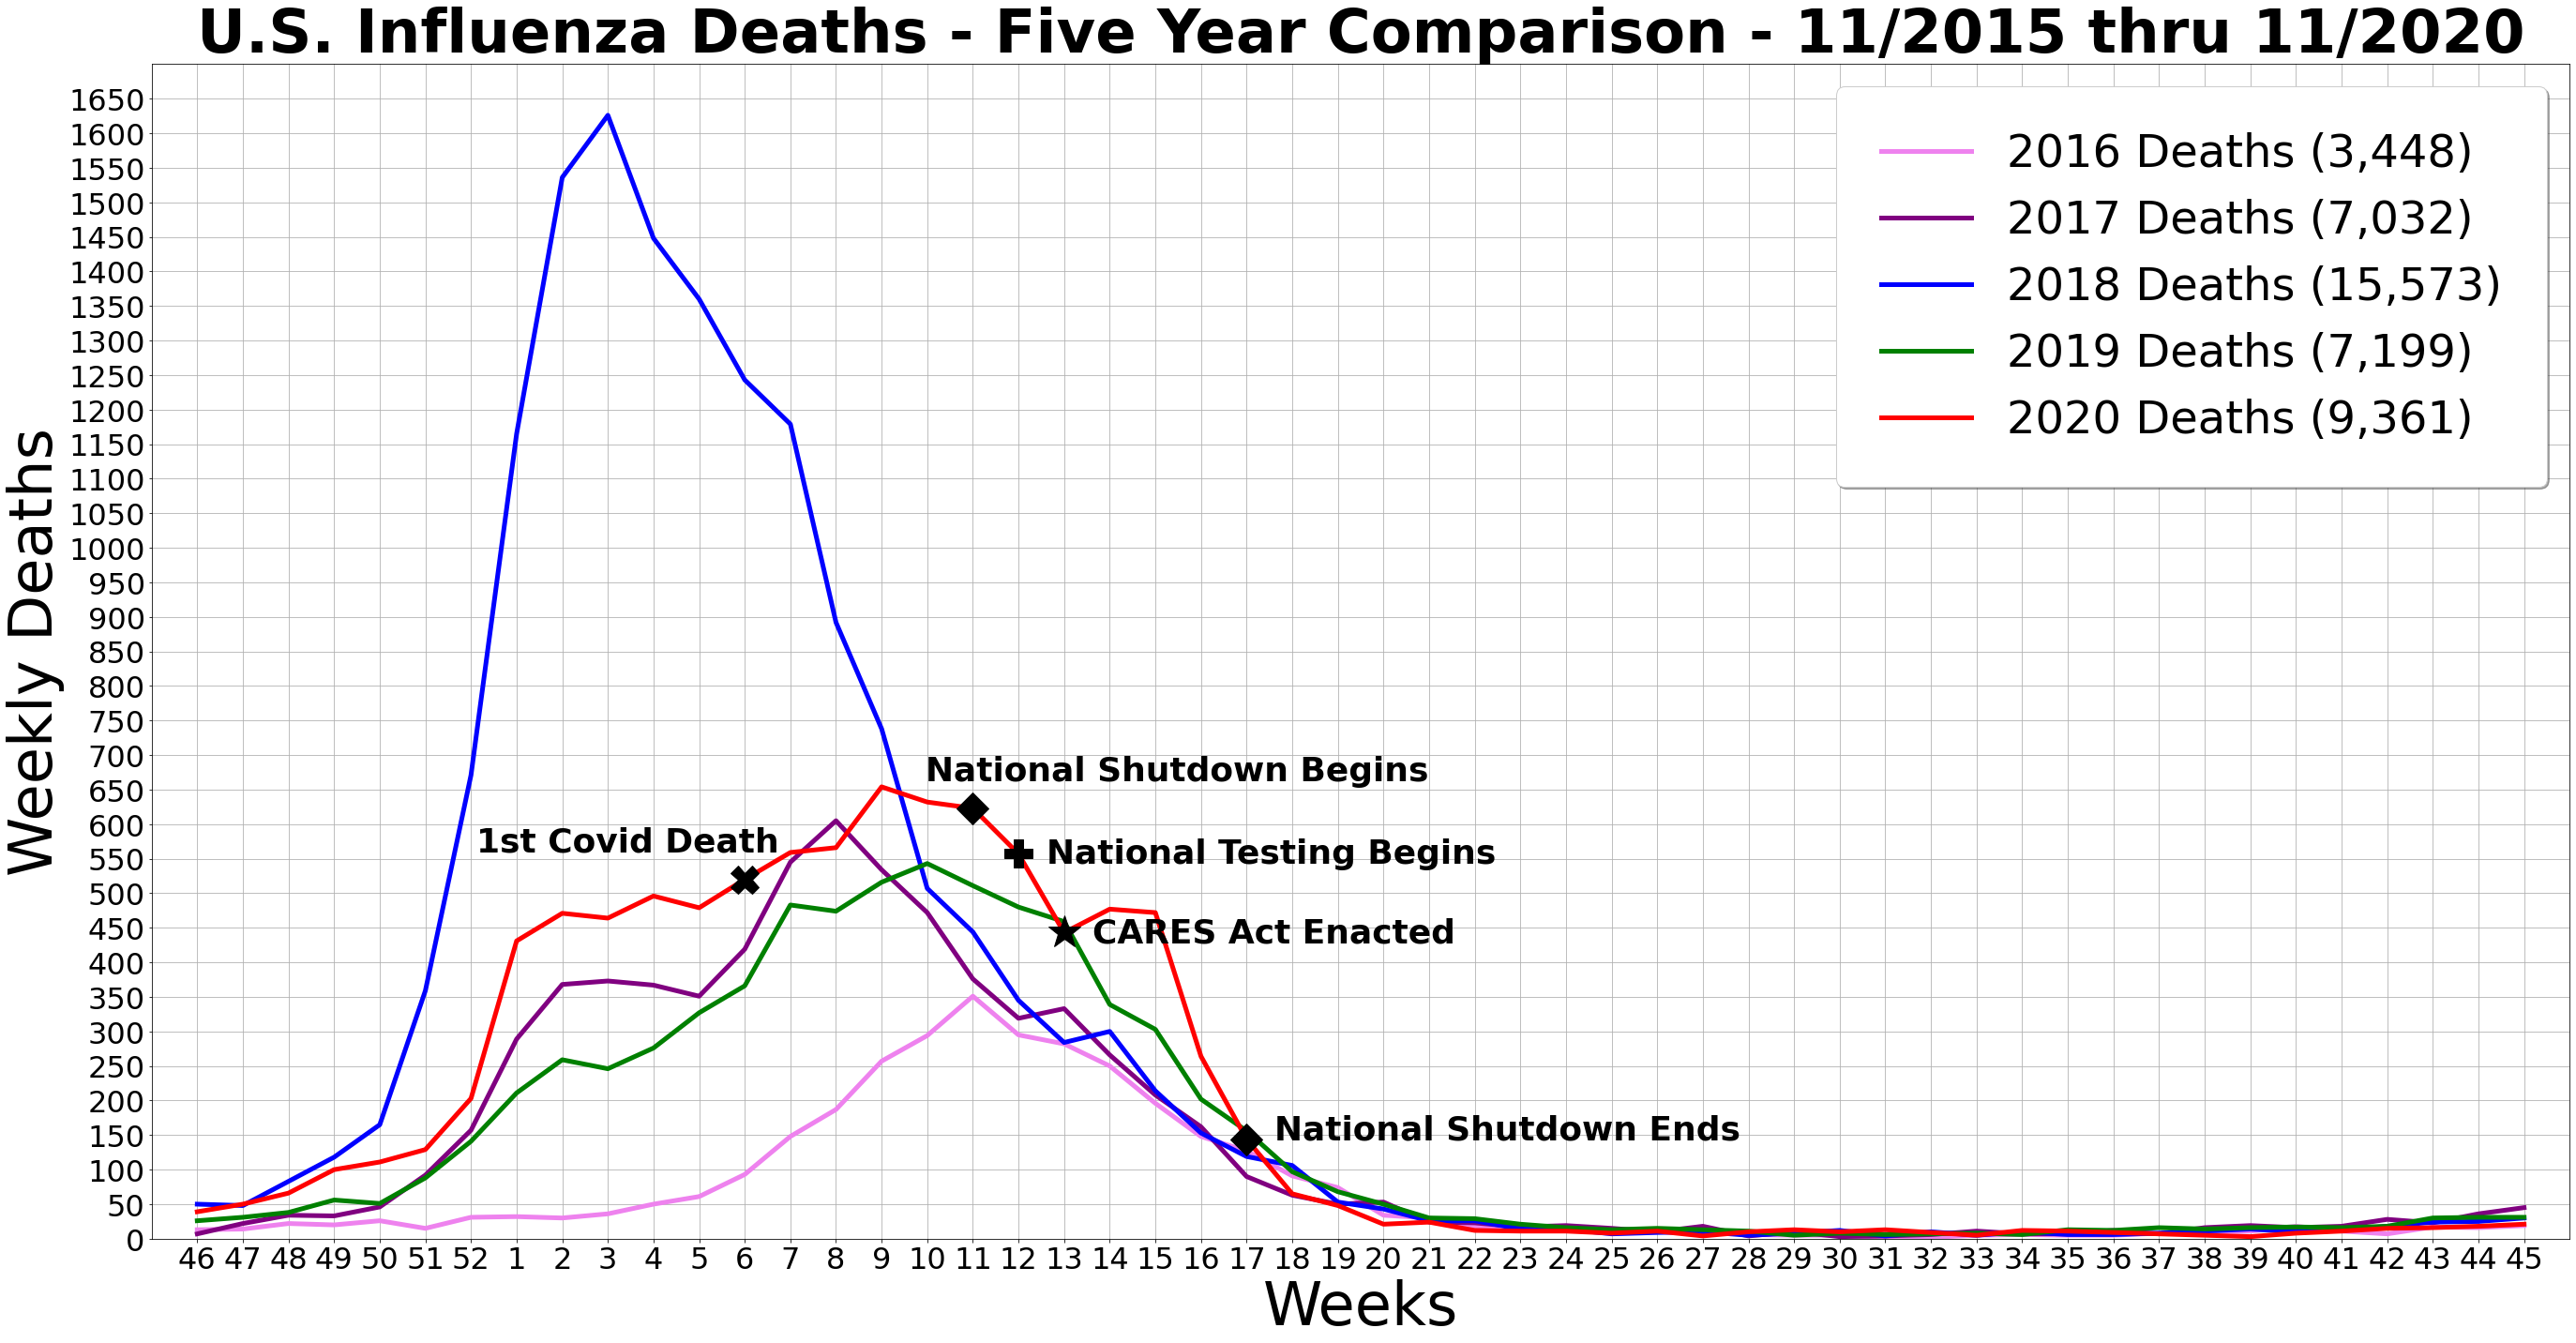

In [24]:
# Plot The 'Influenza Deaths' Annual Data As A Line Chart
deaths_2016, = plt.plot(weeks, flu_2016, color="violet", label="2016 Deaths (3,448)", linewidth=5)
deaths_2017, = plt.plot(weeks, flu_2017, color="purple", label="2017 Deaths (7,032)", linewidth=5)
deaths_2018, = plt.plot(weeks, flu_2018, color="blue", label="2018 Deaths (15,573)", linewidth=5)
deaths_2019, = plt.plot(weeks, flu_2019, color="green", label="2019 Deaths (7,199)", linewidth=5)
deaths_2020, = plt.plot(weeks, flu_2020, color="red", label="2020 Deaths (9,361)", linewidth=5)

# Create Chart Title
plt.title("U.S. Influenza Deaths - Five Year Comparison - 11/2015 thru 11/2020", fontsize=64, weight='bold')

# Create A Legend For The Chart
plt.legend(handles=[deaths_2016, deaths_2017, deaths_2018, deaths_2019, deaths_2020], loc="best", fontsize=48, fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Create labels For The X And Y Axis
plt.xlabel("Weeks", fontsize=64)
plt.ylabel("Weekly Deaths", fontsize=64)

# Set The Limits For The X And Y Axis
plt.xlim(-1,52)
plt.ylim(0,1700)

# Set A Grid For The Chart
plt.grid()

# Adjust Fontsize And Scale For The X And Y Axis
plt.xticks(fontsize=32)
plt.yticks(np.arange(0, 1700, step=50), fontsize=32)

# Set Figure Chart Size
plt.rcParams["figure.figsize"] = [100,50]

# Add Covid-19 Starting Point To Chart
plt.annotate("1st Covid Death", (12, 520), textcoords="offset points", xytext=(-125,30), ha='center', fontsize=36, weight='bold')
plt.plot(12, 520, marker="X", ms=30, color="k")

# Add National Shutdown Starting and Ending Point To Chart
plt.annotate("National Shutdown Begins", (17, 623), textcoords="offset points", xytext=(-50,30), ha='left', fontsize=36, weight='bold')
plt.plot(17, 623, marker="D", ms=24, color="k")
plt.annotate("National Shutdown Ends", (23, 144), textcoords="offset points", xytext=(30,0), ha='left', fontsize=36, weight='bold')
plt.plot(23, 144, marker="D", ms=24, color="k")

# Add National Testing Starting To Chart
plt.annotate("National Testing Begins", (18, 557), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(18, 557, marker="P", ms=30, color="k")

# Add CARES Act Enactment To Chart
plt.annotate("CARES Act Enacted", (19, 443), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(19, 443, marker="*", ms=36, color="k")

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Influenza Deaths.png")

# Show The Chart
plt.show()

In [25]:
# Covid-19 Deaths Data
cov_2020 = cdata_2020["COVID-19 Deaths"]
cweeks = pd.Series(range(6,46))
cweeks = cweeks.astype(str)

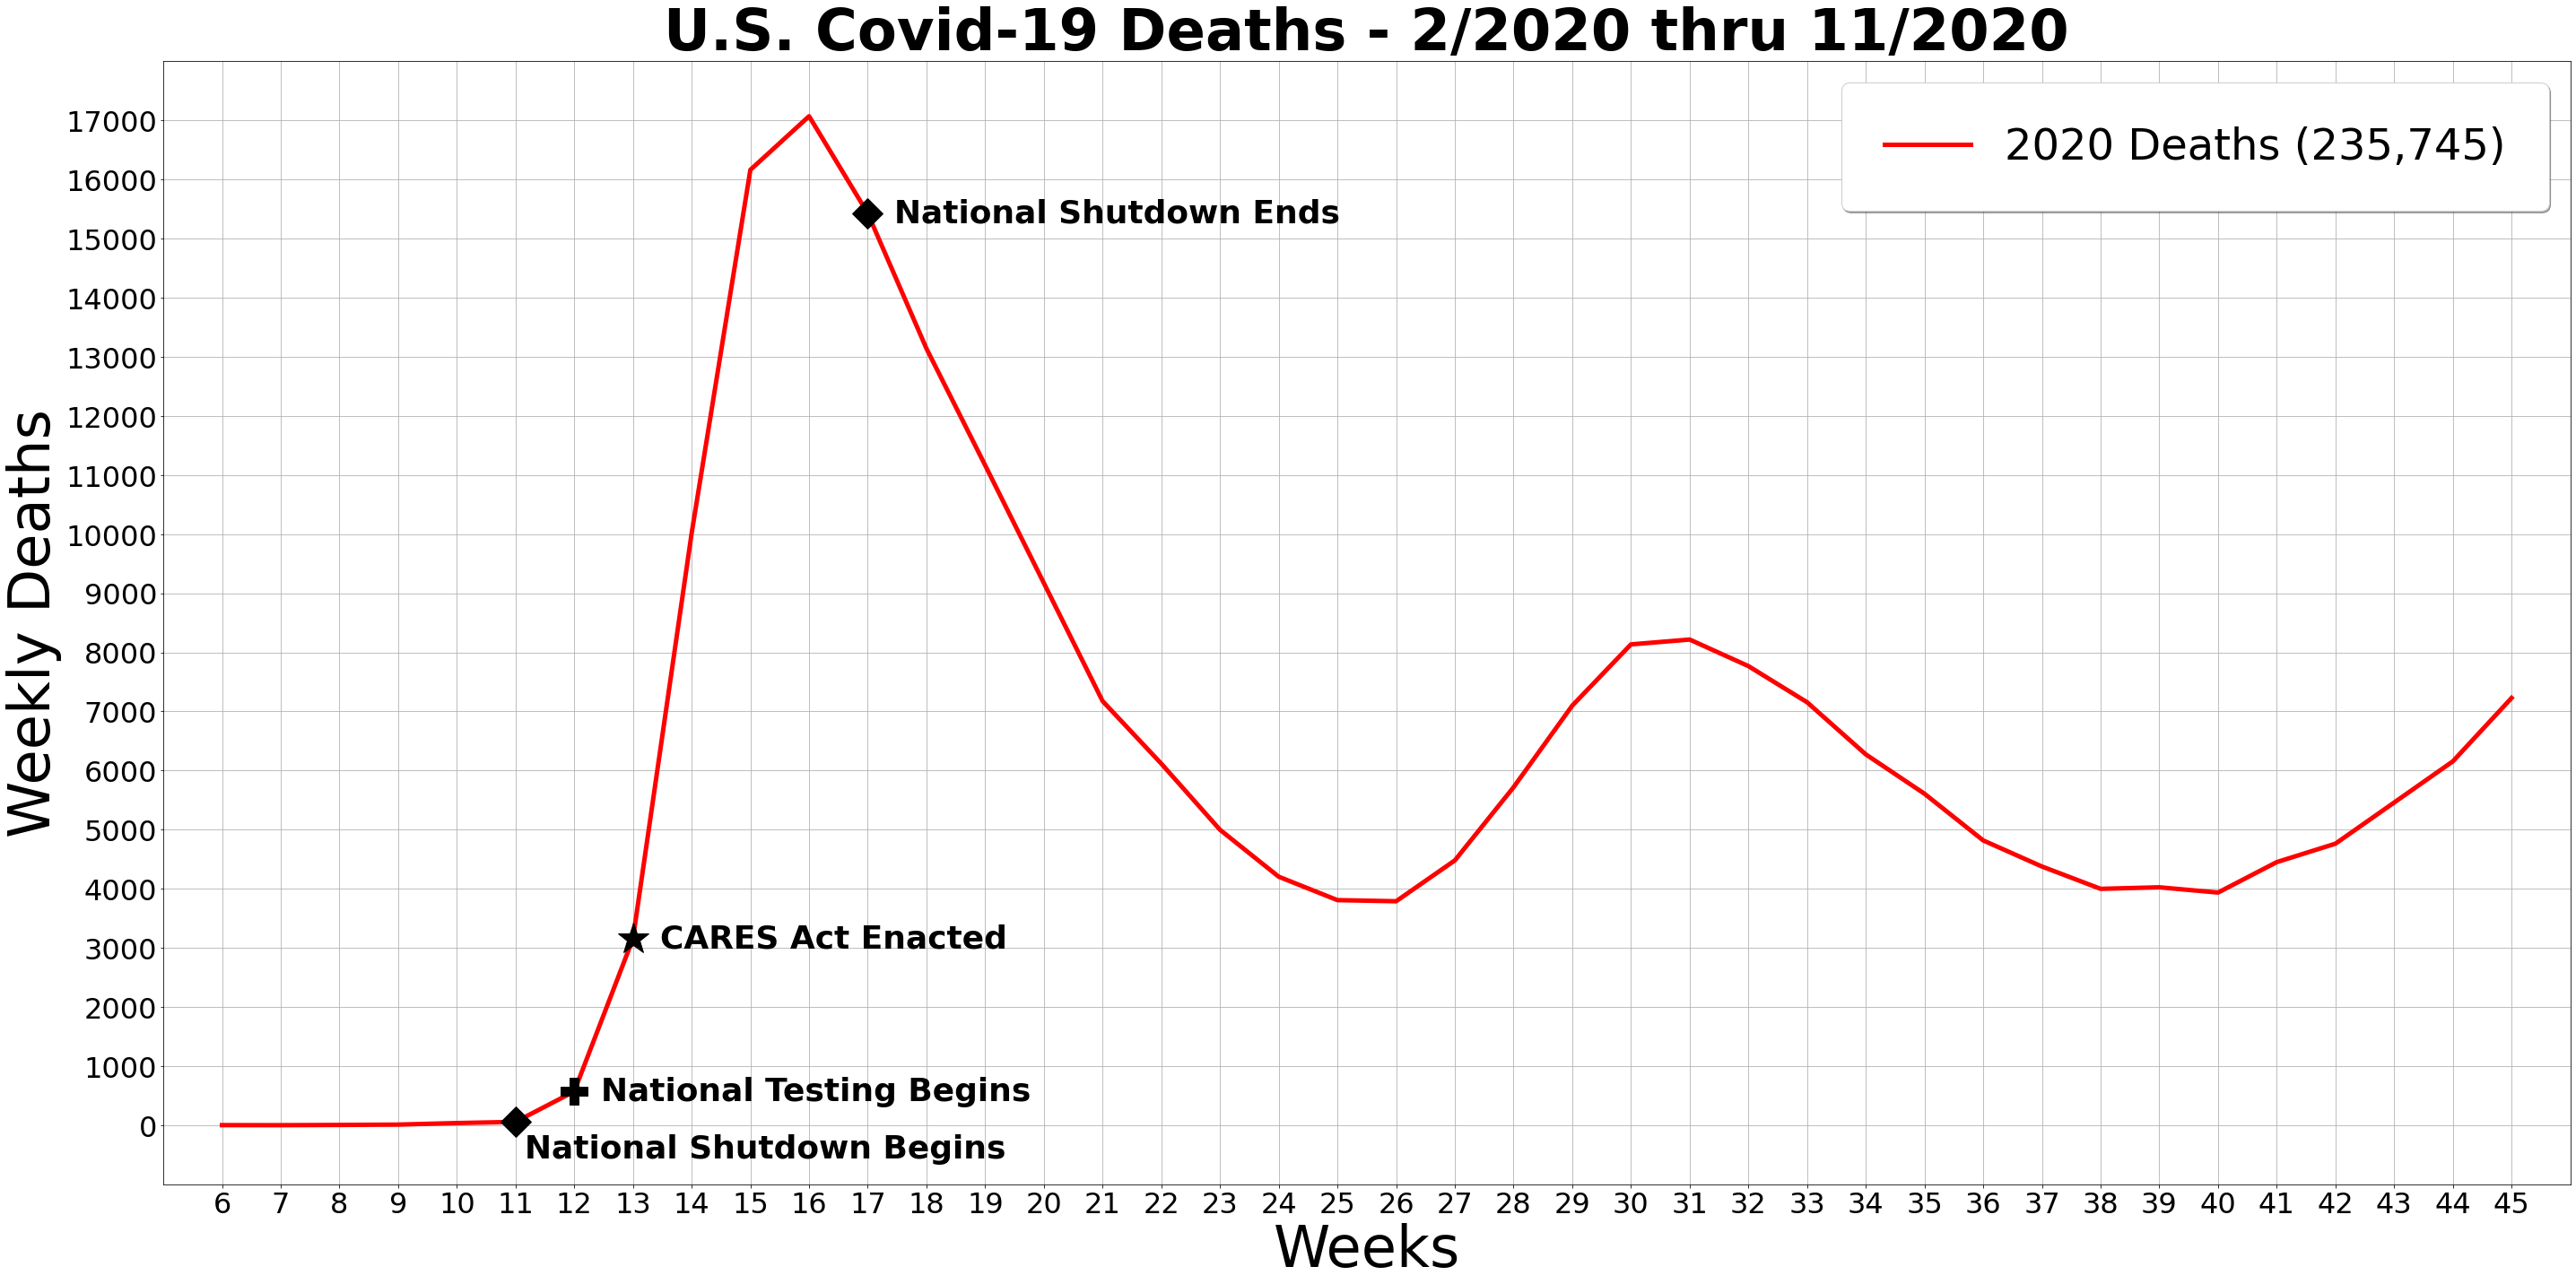

In [27]:
# Plot The 'Covid-19 Deaths' Annual Data As A Line Chart
deaths_2020, = plt.plot(cweeks, cov_2020, color="red", label="2020 Deaths (235,745)", linewidth=5)

# Create Chart Title
plt.title("U.S. Covid-19 Deaths - 2/2020 thru 11/2020", fontsize=64, weight='bold')

# Create A Legend For The Chart
plt.legend(handles=[deaths_2020], loc="best", fontsize=48, fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Create labels For The X And Y Axis
plt.xlabel("Weeks", fontsize=64)
plt.ylabel("Weekly Deaths", fontsize=64)

# Set The Limits For The X And Y Axis
plt.xlim(-1,40)
plt.ylim(-1000, 18000)

# Set A Grid For The Chart
plt.grid()

# Adjust Fontsize And Scale For The X And Y Axis
plt.xticks(fontsize=32)
plt.yticks(np.arange(0, 18000, step=1000), fontsize=32)

# Set Figure Chart Size
plt.rcParams["figure.figsize"] = [100,50]

# Add National Shutdown Starting and Ending Point To Chart
plt.annotate("National Shutdown Begins", (5, 56), textcoords="offset points", xytext=(10,-40), ha='left', fontsize=36, weight='bold')
plt.plot(5, 56, marker="D", ms=24, color="k")
plt.annotate("National Shutdown Ends", (11, 15427), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(11, 15427, marker="D", ms=24, color="k")

# Add National Testing Starting To Chart
plt.annotate("National Testing Begins", (6, 571), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(6, 571, marker="P", ms=30, color="k")

# Add CARES Act Enactment To Chart
plt.annotate("CARES Act Enacted", (7, 3155), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(7, 3155, marker="*", ms=36, color="k")

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Covid-19 Deaths.png")

# Show The Chart
plt.show()

In [28]:
# Deaths (PIC) Data
pic_2016 = data_2016["Deaths (PIC)"]
pic_2017 = data_2017["Deaths (PIC)"]
pic_2018 = data_2018["Deaths (PIC)"]
pic_2019 = data_2019["Deaths (PIC)"]
pic_2020 = data_2020["Deaths (PIC)"]

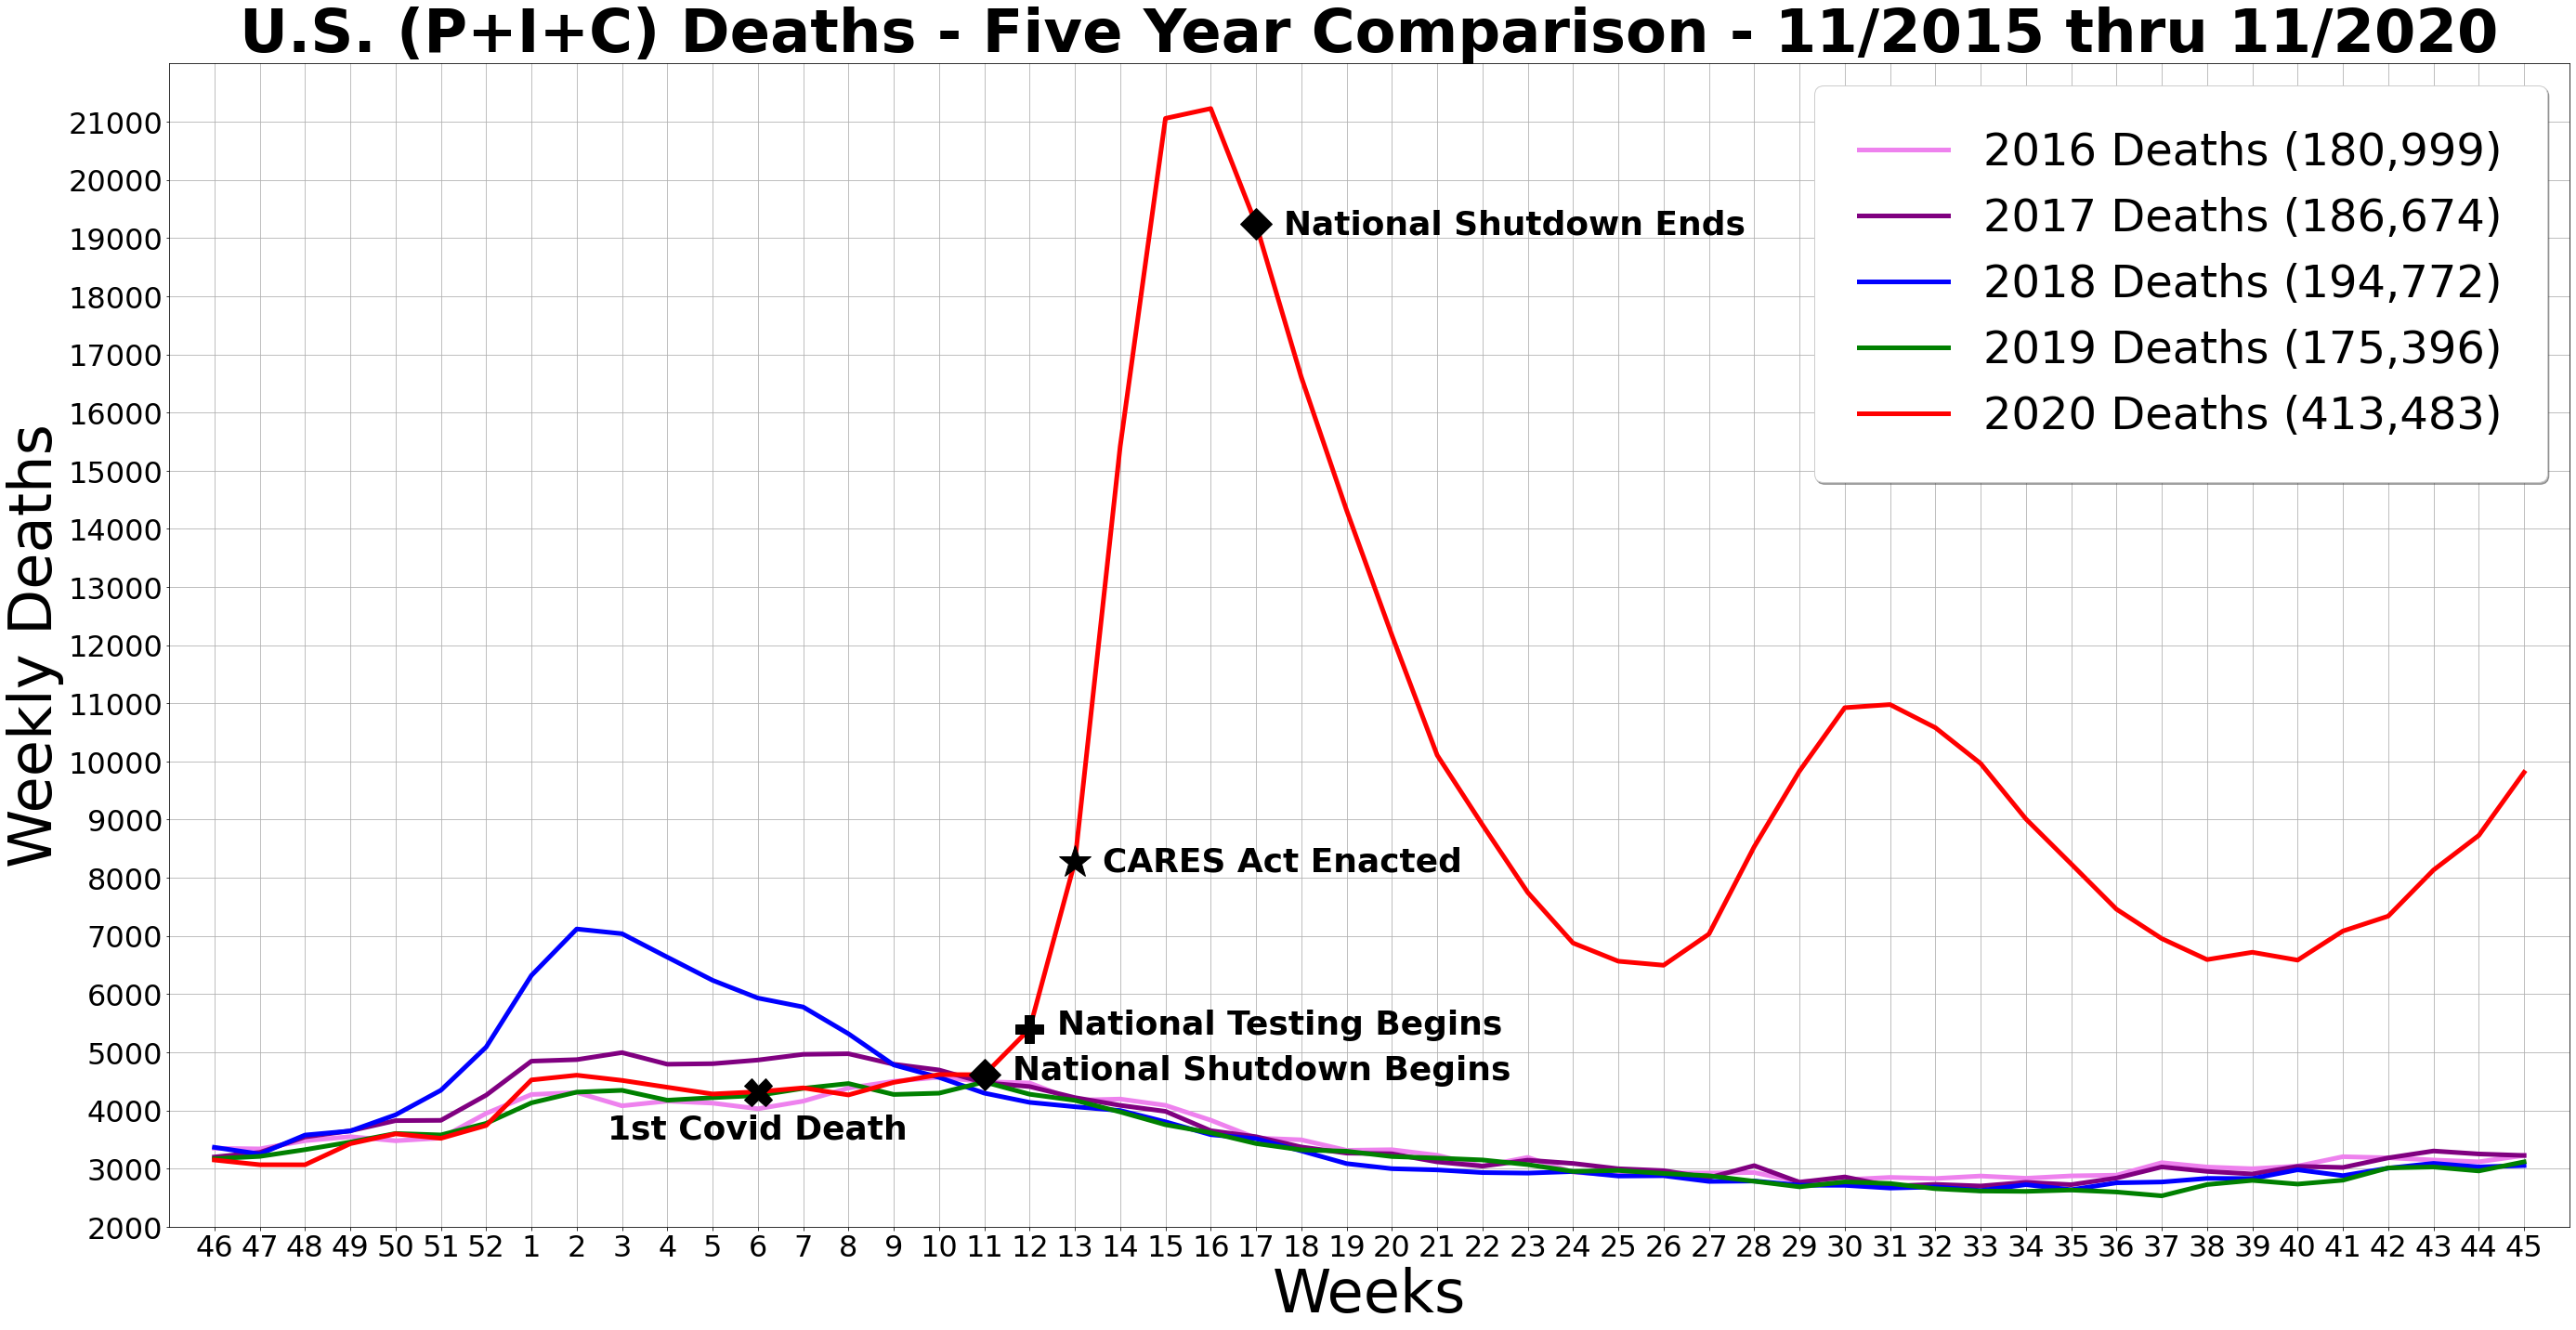

In [30]:
# Plot The 'Pneumonia Deaths' Annual Data As A Line Chart
deaths_2016, = plt.plot(weeks, pic_2016, color="violet", label="2016 Deaths (180,999)", linewidth=5)
deaths_2017, = plt.plot(weeks, pic_2017, color="purple", label="2017 Deaths (186,674)", linewidth=5)
deaths_2018, = plt.plot(weeks, pic_2018, color="blue", label="2018 Deaths (194,772)", linewidth=5)
deaths_2019, = plt.plot(weeks, pic_2019, color="green", label="2019 Deaths (175,396)", linewidth=5)
deaths_2020, = plt.plot(weeks, pic_2020, color="red", label="2020 Deaths (413,483)", linewidth=5)

# Create Chart Title
plt.title("U.S. (P+I+C) Deaths - Five Year Comparison - 11/2015 thru 11/2020", fontsize=64, weight='bold')

# Create A Legend For The Chart
plt.legend(handles=[deaths_2016, deaths_2017, deaths_2018, deaths_2019, deaths_2020], loc="best", fontsize=48, fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Create labels For The X And Y Axis
plt.xlabel("Weeks", fontsize=64)
plt.ylabel("Weekly Deaths", fontsize=64)

# Set The Limits For The X And Y Axis
plt.xlim(-1,52)
plt.ylim(2000,22000)

# Set A Grid For The Chart
plt.grid()

# Adjust Fontsize And Scale For The X And Y Axis
plt.xticks(fontsize=32)
plt.yticks(np.arange(2000, 22000, step=1000), fontsize=32)

# Set Figure Chart Size
plt.rcParams["figure.figsize"] = [100,50]

# Add Covid-19 Starting Point To Chart
plt.annotate("1st Covid Death", (12, 4320), textcoords="offset points", xytext=(0,-50), ha='center', fontsize=36, weight='bold')
plt.plot(12, 4320, marker="X", ms=30, color="k")

# Add National Shutdown Starting and Ending Point To Chart
plt.annotate("National Shutdown Begins", (17, 4613), textcoords="offset points", xytext=(30,-5), ha='left', fontsize=36, weight='bold')
plt.plot(17, 4613, marker="D", ms=24, color="k")
plt.annotate("National Shutdown Ends", (23, 19237), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(23, 19237, marker="D", ms=24, color="k")

# Add National Testing Starting To Chart
plt.annotate("National Testing Begins", (18, 5401), textcoords="offset points", xytext=(30,-5), ha='left', fontsize=36, weight='bold')
plt.plot(18, 5401, marker="P", ms=30, color="k")

# Add CARES Act Enactment To Chart
plt.annotate("CARES Act Enacted", (19, 8276), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(19, 8276, marker="*", ms=36, color="k")

plt.tight_layout()

# Save Plot As .png File
plt.savefig("PIC Deaths.png")

# Show The Chart
plt.show()

In [31]:
data_2020["COVID-19_Pneumonia"] = (data_2020["Pneumonia Deaths"] + 
                                   data_2020["Influenza Deaths"] + 
                                   data_2020["COVID-19 Deaths"]) - data_2020["Deaths (PIC)"]

In [32]:
data_2020["Other_Pneumonia"] = data_2020["Pneumonia Deaths"] - data_2020["COVID-19_Pneumonia"]

In [33]:
data_2020["COVID-19_Other"] = data_2020["COVID-19 Deaths"] - data_2020["COVID-19_Pneumonia"]

In [34]:
# 2020 Dataframe Aggregate Analysis With Added Pneumonia Columns
data_2020.agg({'% of Deaths (PI)' : ['mean', 'min', 'max'], 
               '% of Deaths (PIC)' : ['mean', 'min', 'max'],
               'All Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Pneumonia Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Influenza Deaths' : ['sum', 'mean', 'min', 'max'], 
               'COVID-19 Deaths' : ['sum', 'mean', 'min', 'max'], 
               'Deaths (PIC)' : ['sum', 'mean', 'min', 'max'],
               'COVID-19_Pneumonia' : ['sum', 'mean', 'min', 'max'],
               'Other_Pneumonia' : ['sum', 'mean', 'min', 'max'],
               'COVID-19_Other' : ['sum', 'mean', 'min', 'max']}
             )

,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC),COVID-19_Pneumonia,Other_Pneumonia,COVID-19_Other
max,15.786069,27.727196,7.882900e+04,11972.000000,654.000000,17071.000000,21226.000000,7551.000000,4918.000000,9584.00
mean,8.871230,12.675531,6.081027e+04,5323.826923,180.019231,4533.557692,7951.596154,2085.807692,3238.019231,2447.75
min,5.455613,5.455613,5.546500e+04,2999.000000,3.000000,0.000000,3065.000000,0.000000,2548.000000,0.00
sum,NaN,NaN,3.162134e+06,276839.000000,9361.000000,235745.000000,413483.000000,108462.000000,168377.000000,127283.00


In [35]:
data_2020

,Year,Week,% of Deaths (PI),% of Deaths (PIC),All Deaths,Pneumonia Deaths,Influenza Deaths,COVID-19 Deaths,Deaths (PIC),COVID-19_Pneumonia,Other_Pneumonia,COVID-19_Other
319,2019,46,5.631106,5.631106,55886,3108,39,0,3147,0,3108,0
320,2019,47,5.455613,5.455613,56199,3016,50,0,3066,0,3016,0
321,2019,48,5.526007,5.526007,55465,2999,66,0,3065,0,2999,0
322,2019,49,5.982235,5.982235,57303,3328,100,0,3428,0,3328,0
323,2019,50,6.238510,6.238510,57658,3486,111,0,3597,0,3486,0
324,2019,51,6.129841,6.129841,57424,3391,129,0,3520,0,3391,0
325,2019,52,6.399466,6.399466,58458,3538,203,0,3741,0,3538,0
326,2020,1,7.537990,7.537990,60016,4093,431,0,4524,0,4093,0
327,2020,2,7.605034,7.605034,60552,4134,471,0,4605,0,4134,0
328,2020,3,7.629538,7.629538,59191,4052,464,0,4516,0,4052,0


In [36]:
# Create Targeted Annual Dataframes

# 2016 Targeted Dataframe
pdata_2016 = flu_cov_clean[(flu_cov_clean['Year']==2016) & (flu_cov_clean['Week']>=8)]
pdata_2016 = pdata_2016.drop(pdata_2016[(pdata_2016['Year']==2016) & (pdata_2016['Week']>=46)].index)
# 2017 Targeted Dataframe
pdata_2017 = flu_cov_clean[(flu_cov_clean['Year']==2017) & (flu_cov_clean['Week']>=8)]
pdata_2017 = pdata_2017.drop(pdata_2017[(pdata_2017['Year']==2017) & (pdata_2017['Week']>=46)].index)
# 2018 Targeted Dataframe
pdata_2018 = flu_cov_clean[(flu_cov_clean['Year']==2018) & (flu_cov_clean['Week']>=8)]
pdata_2018 = pdata_2018.drop(pdata_2018[(pdata_2018['Year']==2018) & (pdata_2018['Week']>=46)].index)
# 2019 Targeted Dataframe
pdata_2019 = flu_cov_clean[(flu_cov_clean['Year']==2019) & (flu_cov_clean['Week']>=8)]
pdata_2019 = pdata_2019.drop(pdata_2019[(pdata_2019['Year']==2019) & (pdata_2019['Week']>=46)].index)
# 2020 Targeted Dataframe
pdata_2020 = data_2020[(data_2020['Year']==2020) & (data_2020['Week']>=8)]

In [37]:
# Targeted Pneumonia Data
tpneu_2016 = pdata_2016["Pneumonia Deaths"]
tpneu_2017 = pdata_2017["Pneumonia Deaths"]
tpneu_2018 = pdata_2018["Pneumonia Deaths"]
tpneu_2019 = pdata_2019["Pneumonia Deaths"]
tpneu_2020 = pdata_2020["Other_Pneumonia"]
cpneu_2020 = pdata_2020["COVID-19_Pneumonia"]
pweeks = pd.Series(range(8,46))
pweeks = pweeks.astype(str)

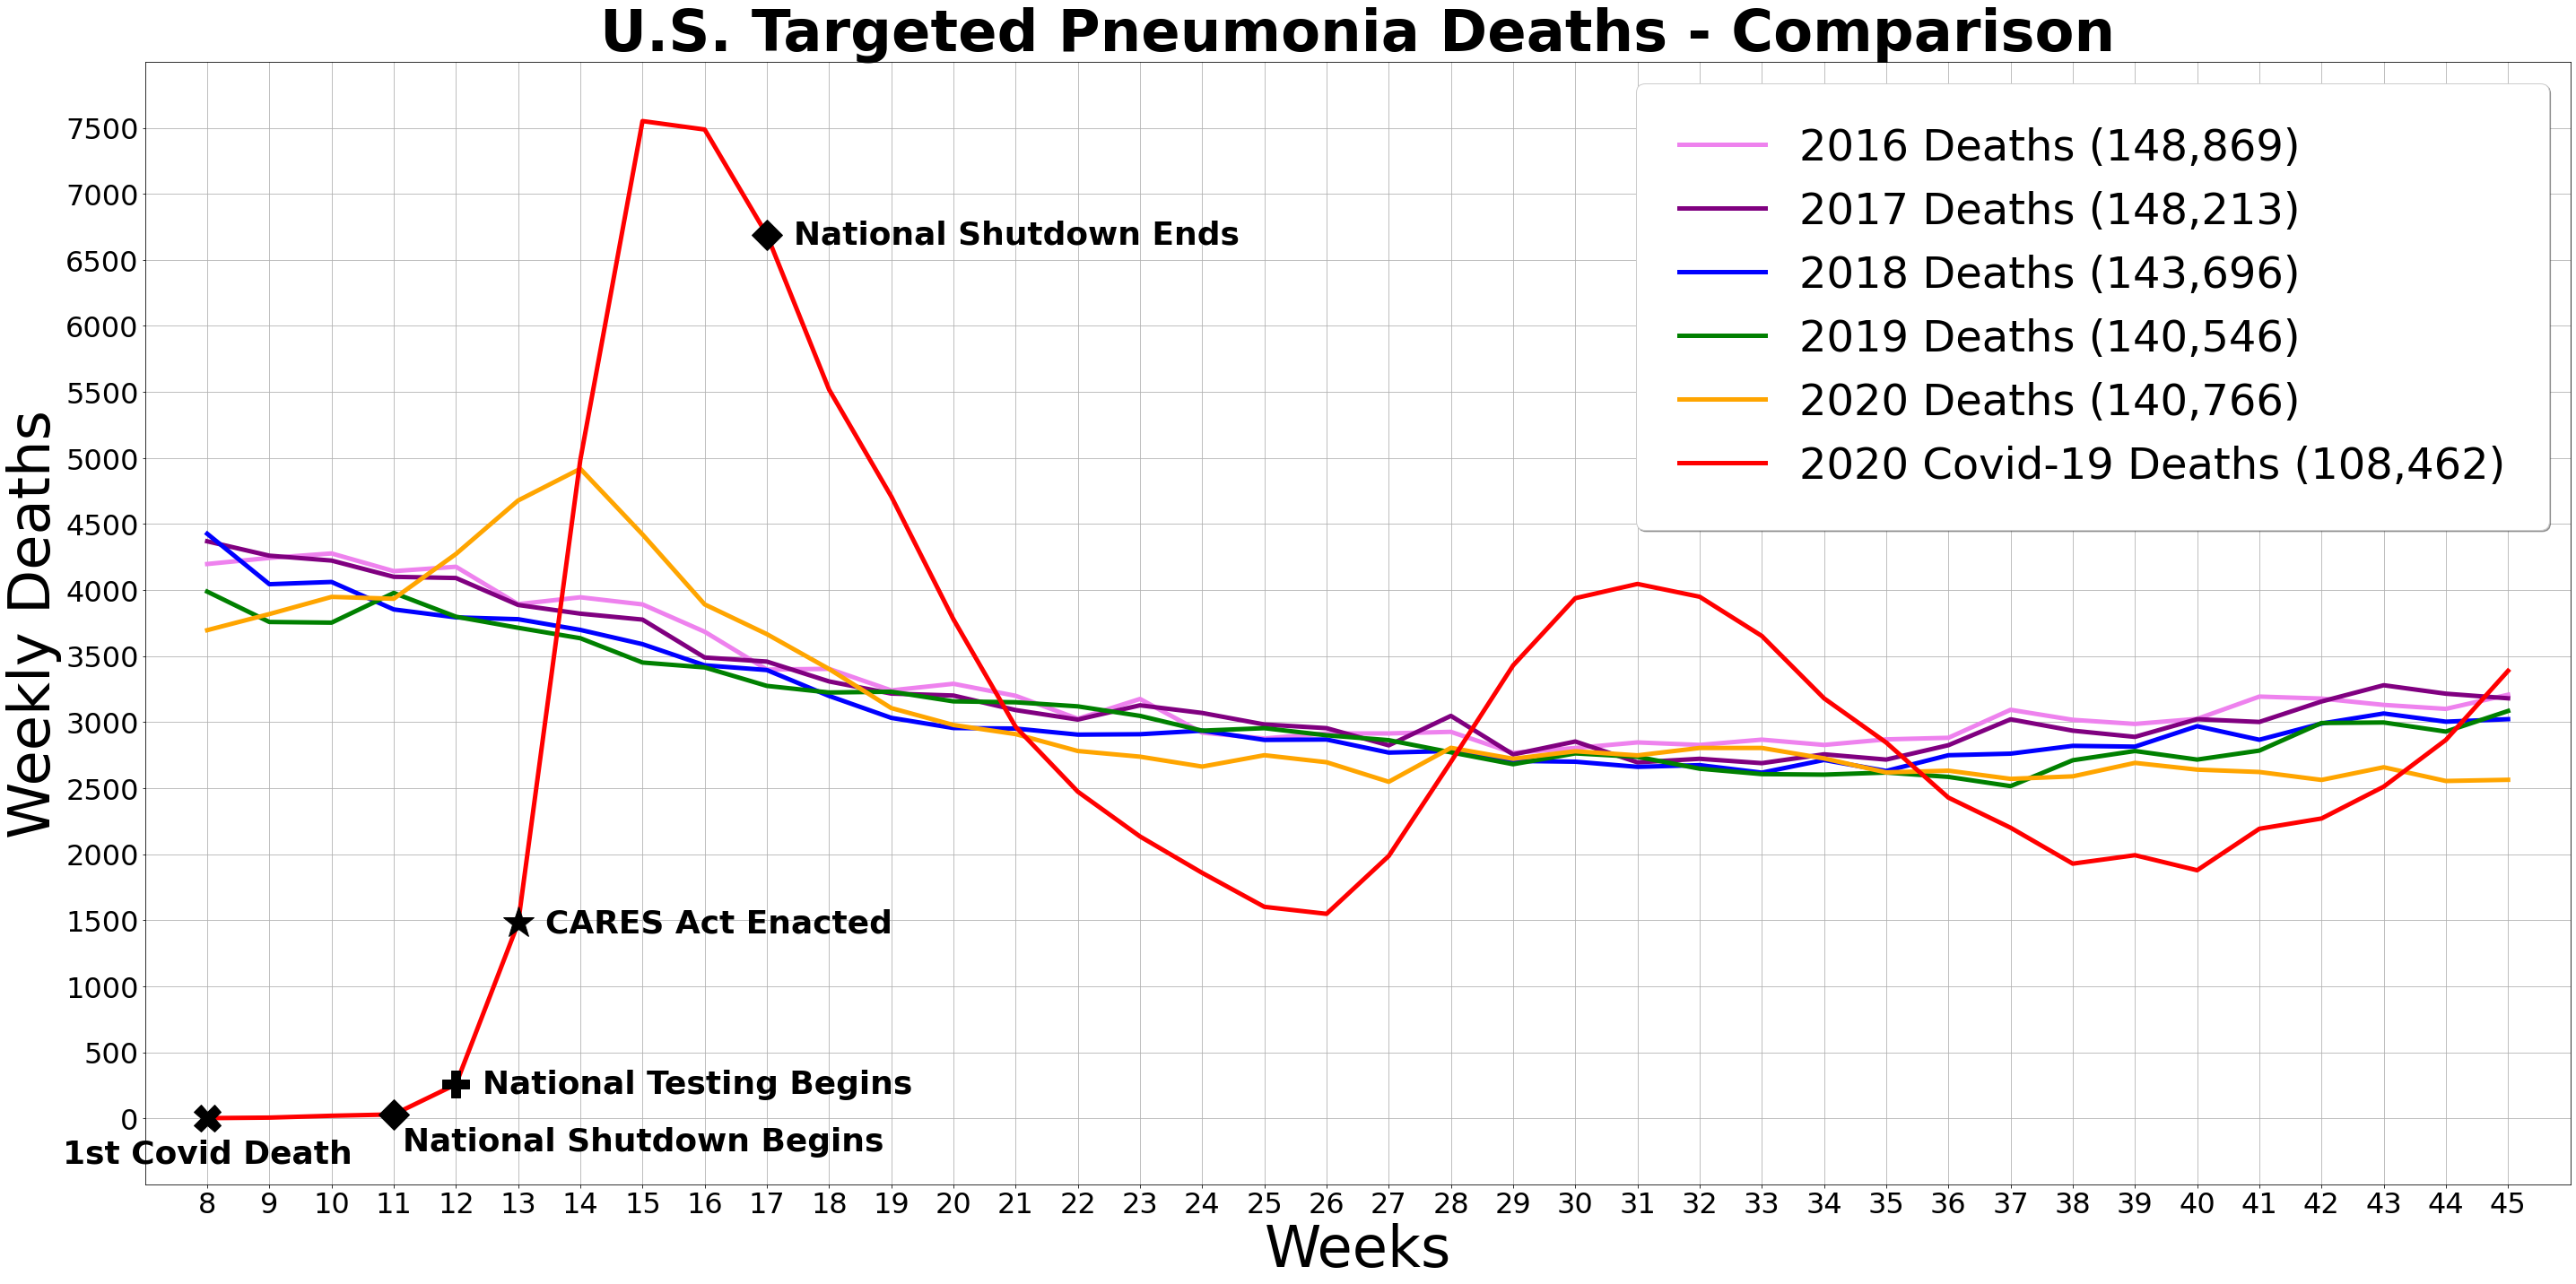

In [42]:
# Plot The 'Targeted Pneumonia Deaths' Annual Data As A Line Chart
deaths_2016, = plt.plot(pweeks, tpneu_2016, color="violet", label="2016 Deaths (148,869)", linewidth=5)
deaths_2017, = plt.plot(pweeks, tpneu_2017, color="purple", label="2017 Deaths (148,213)", linewidth=5)
deaths_2018, = plt.plot(pweeks, tpneu_2018, color="blue", label="2018 Deaths (143,696)", linewidth=5)
deaths_2019, = plt.plot(pweeks, tpneu_2019, color="green", label="2019 Deaths (140,546)", linewidth=5)
deaths_2020, = plt.plot(pweeks, tpneu_2020, color="orange", label="2020 Deaths (140,766)", linewidth=5)
cdeaths_2020, = plt.plot(pweeks, cpneu_2020, color="red", label="2020 Covid-19 Deaths (108,462)", linewidth=5)

# Create Chart Title
plt.title("U.S. Targeted Pneumonia Deaths - Comparison", fontsize=64, weight='bold')

# Create A Legend For The Chart
plt.legend(handles=[deaths_2016, deaths_2017, deaths_2018, deaths_2019, deaths_2020, cdeaths_2020], loc="best", fontsize=48, fancybox=True, framealpha=1, shadow=True, borderpad=1)

# Create labels For The X And Y Axis
plt.xlabel("Weeks", fontsize=64)
plt.ylabel("Weekly Deaths", fontsize=64)

# Set The Limits For The X And Y Axis
plt.xlim(-1,38)
plt.ylim(-500,8000)

# Set A Grid For The Chart
plt.grid()

# Adjust Fontsize And Scale For The X And Y Axis
plt.xticks(fontsize=32)
plt.yticks(np.arange(0, 8000, step=500), fontsize=32)

# Set Figure Chart Size
plt.rcParams["figure.figsize"] = [100,50]

# Add Covid-19 Starting Point To Chart
plt.annotate("1st Covid Death", (0, 1), textcoords="offset points", xytext=(0, -50), ha='center', fontsize=36, weight='bold')
plt.plot(0, 1, marker="X", ms=30, color="k")

# Add National Shutdown Starting and Ending Point To Chart
plt.annotate("National Shutdown Begins", (3, 29), textcoords="offset points", xytext=(10,-40), ha='left', fontsize=36, weight='bold')
plt.plot(3, 29, marker="D", ms=24, color="k")
plt.annotate("National Shutdown Ends", (9, 6690), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(9, 6690, marker="D", ms=24, color="k")

# Add National Testing Starting To Chart
plt.annotate("National Testing Begins", (4, 257), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(4, 257, marker="P", ms=30, color="k")

# Add CARES Act Enactment To Chart
plt.annotate("CARES Act Enacted", (5, 1478), textcoords="offset points", xytext=(30,-10), ha='left', fontsize=36, weight='bold')
plt.plot(5, 1478, marker="*", ms=36, color="k")

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Targeted Pneumonia Deaths.png")

# Show The Chart
plt.show()

In [43]:
# Perform ANOVA on Targeted Pneumonia Data Sets From 2016-2019
stats.f_oneway(tpneu_2016, tpneu_2017, tpneu_2018, tpneu_2019)

F_onewayResult(statistic=1.658029273333881, pvalue=0.1786010574360597)

In [44]:
# Perform ANOVA On Targeted Pneumonia Data Sets From 2016-2020
stats.f_oneway(tpneu_2016, tpneu_2017, tpneu_2018, tpneu_2019, tpneu_2020)

F_onewayResult(statistic=1.1597318426407524, pvalue=0.33012052819617593)

In [45]:
# ANOVA results show that the increased variability in the 2020 target pneumonia data drops the pvalue considerably, but does
# not show a statistically significant difference from 2016-2019 target pneumonia data.

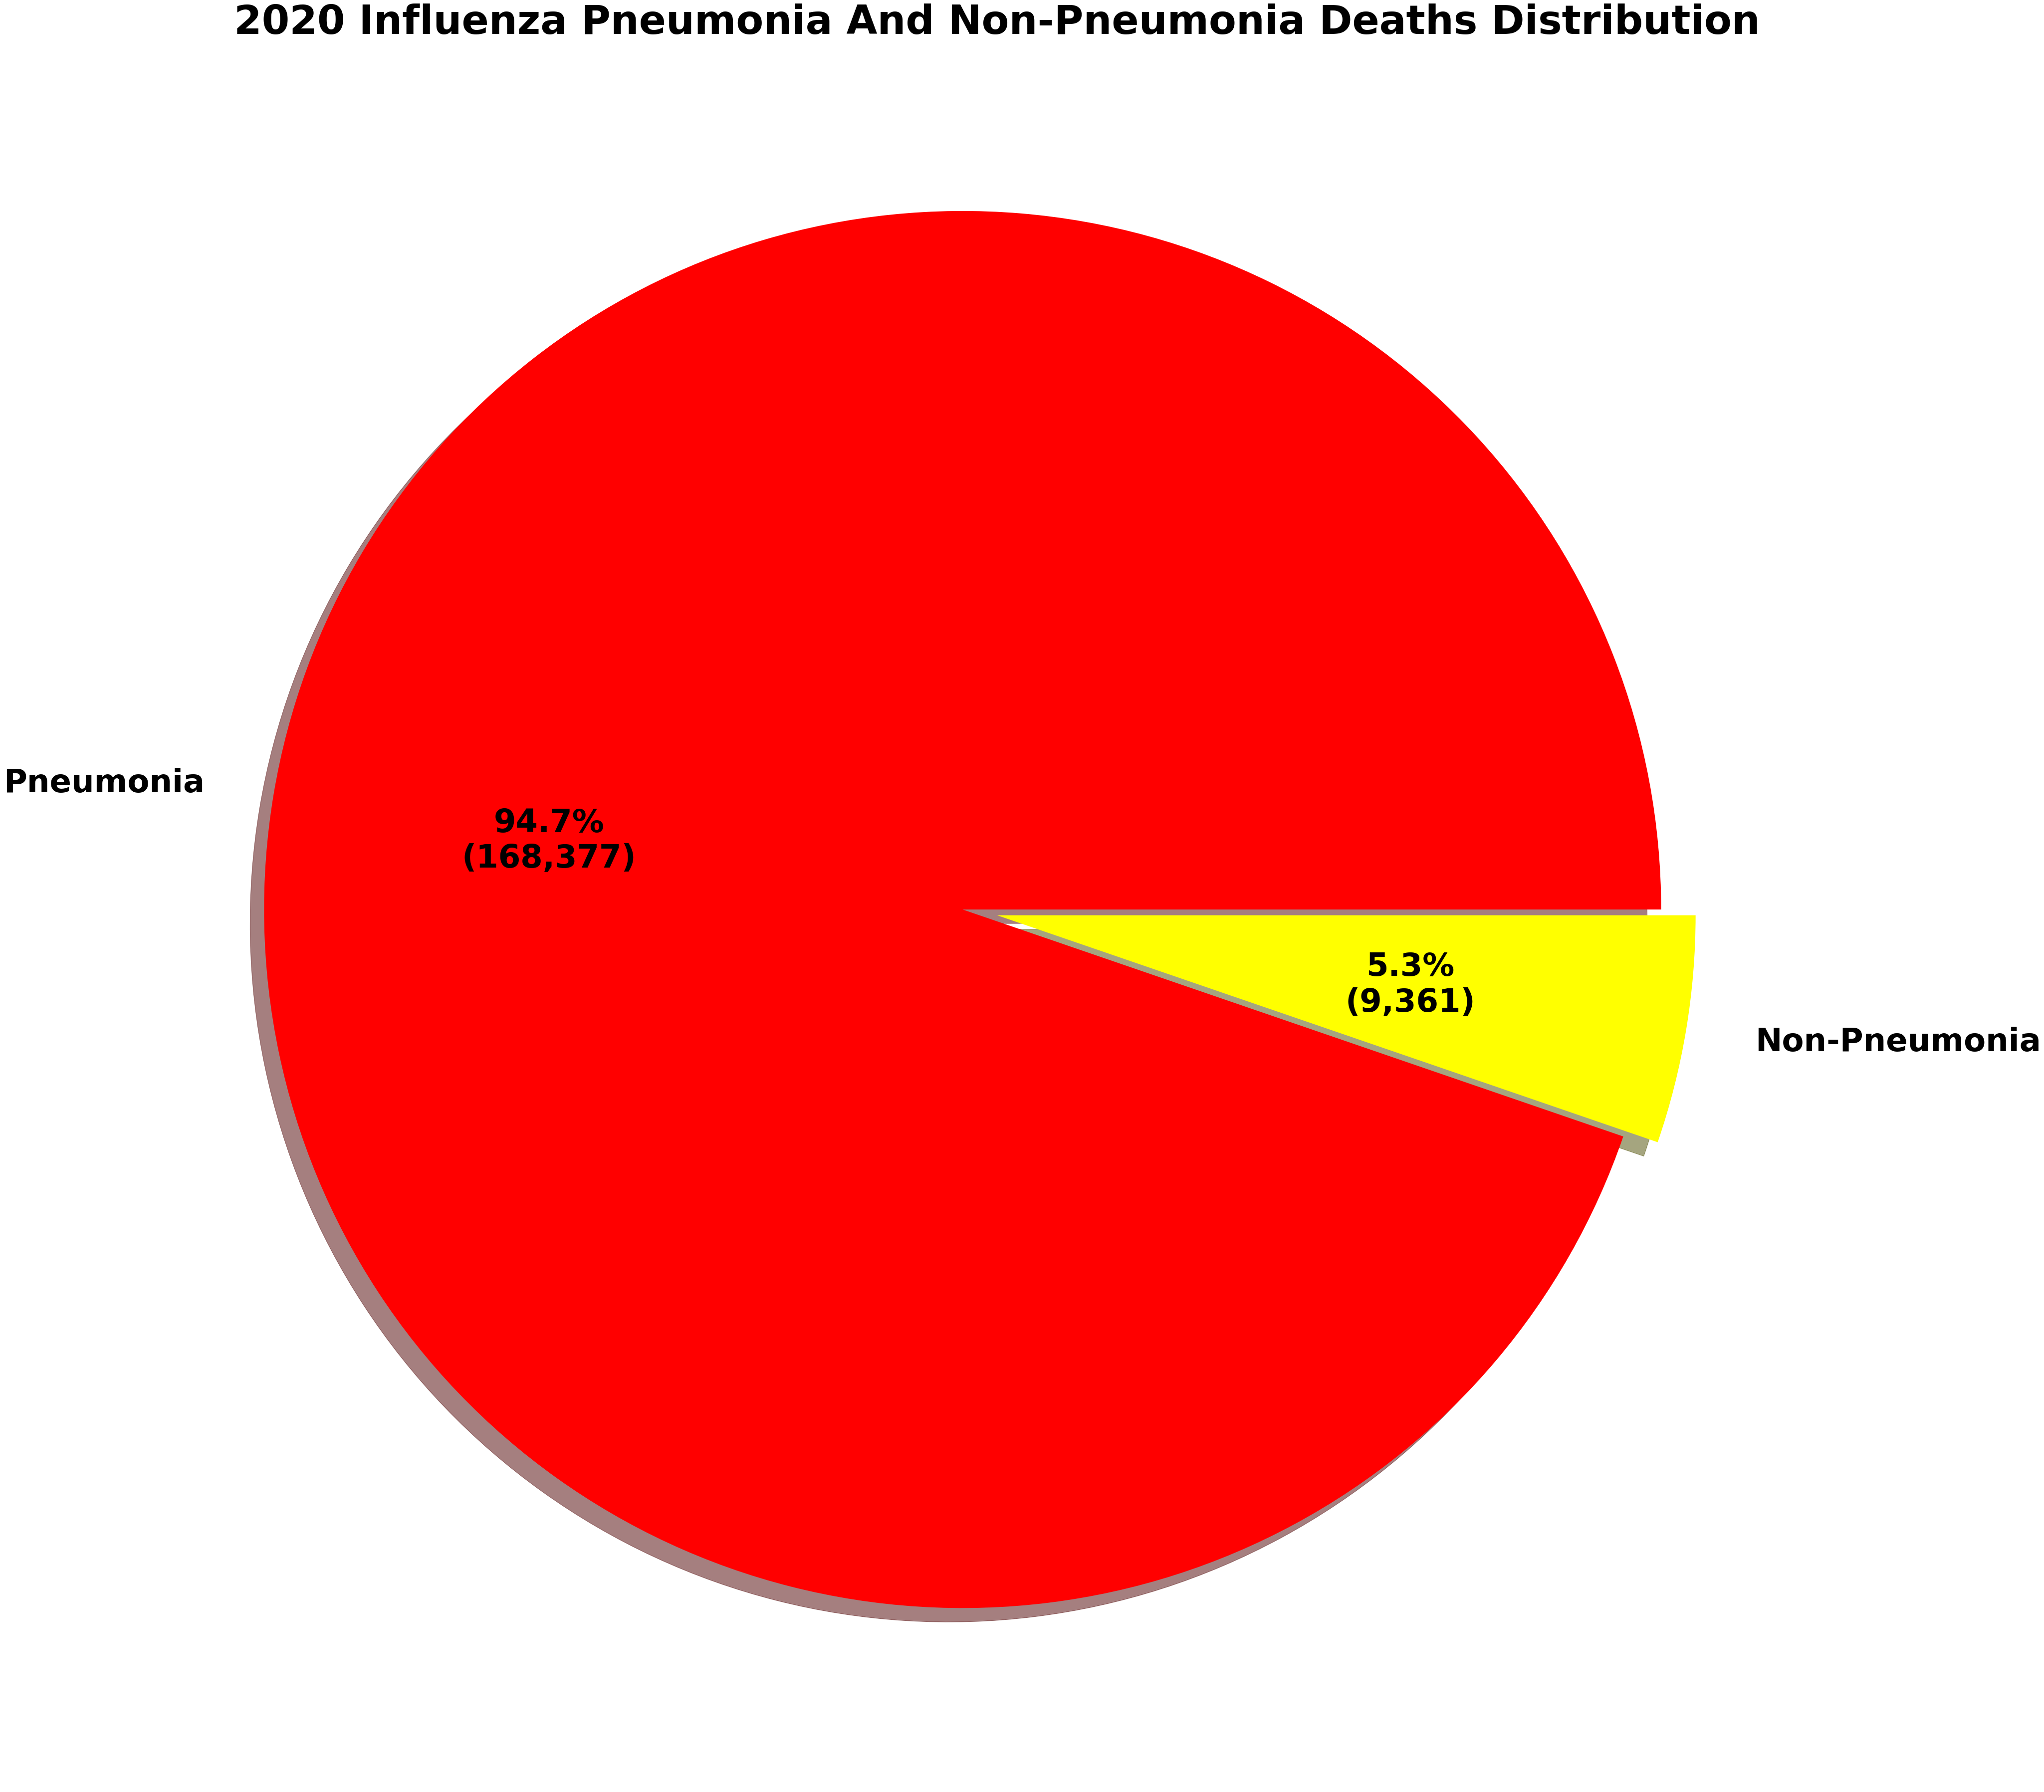

In [46]:
# Generate A Pie Plot Showing The Distribution Of Pneumonia And Non-Pneumonia Deaths For 2020 Influenza
type = ["Pneumonia", "Non-Pneumonia"]
pneumonia = (data_2020['Other_Pneumonia']).sum()
non_pneumonia = (data_2020['Influenza Deaths']).sum()
type_counts = [pneumonia, non_pneumonia]
colors = ["red", "yellow"]
explode = (0.05, 0)
plt.pie(type_counts, explode=explode, labels=type, colors=colors, autopct=lambda p : '{:.1f}%\n({:,.0f})'.format(p,p * sum(type_counts)/100), shadow=True, startangle=0, textprops={'fontsize': 64, 'weight':'bold'})
plt.title("2020 Influenza Pneumonia And Non-Pneumonia Deaths Distribution", fontsize=80, fontweight='bold')

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Influenza Deaths Distribution.png")

# Show The Chart
plt.show()

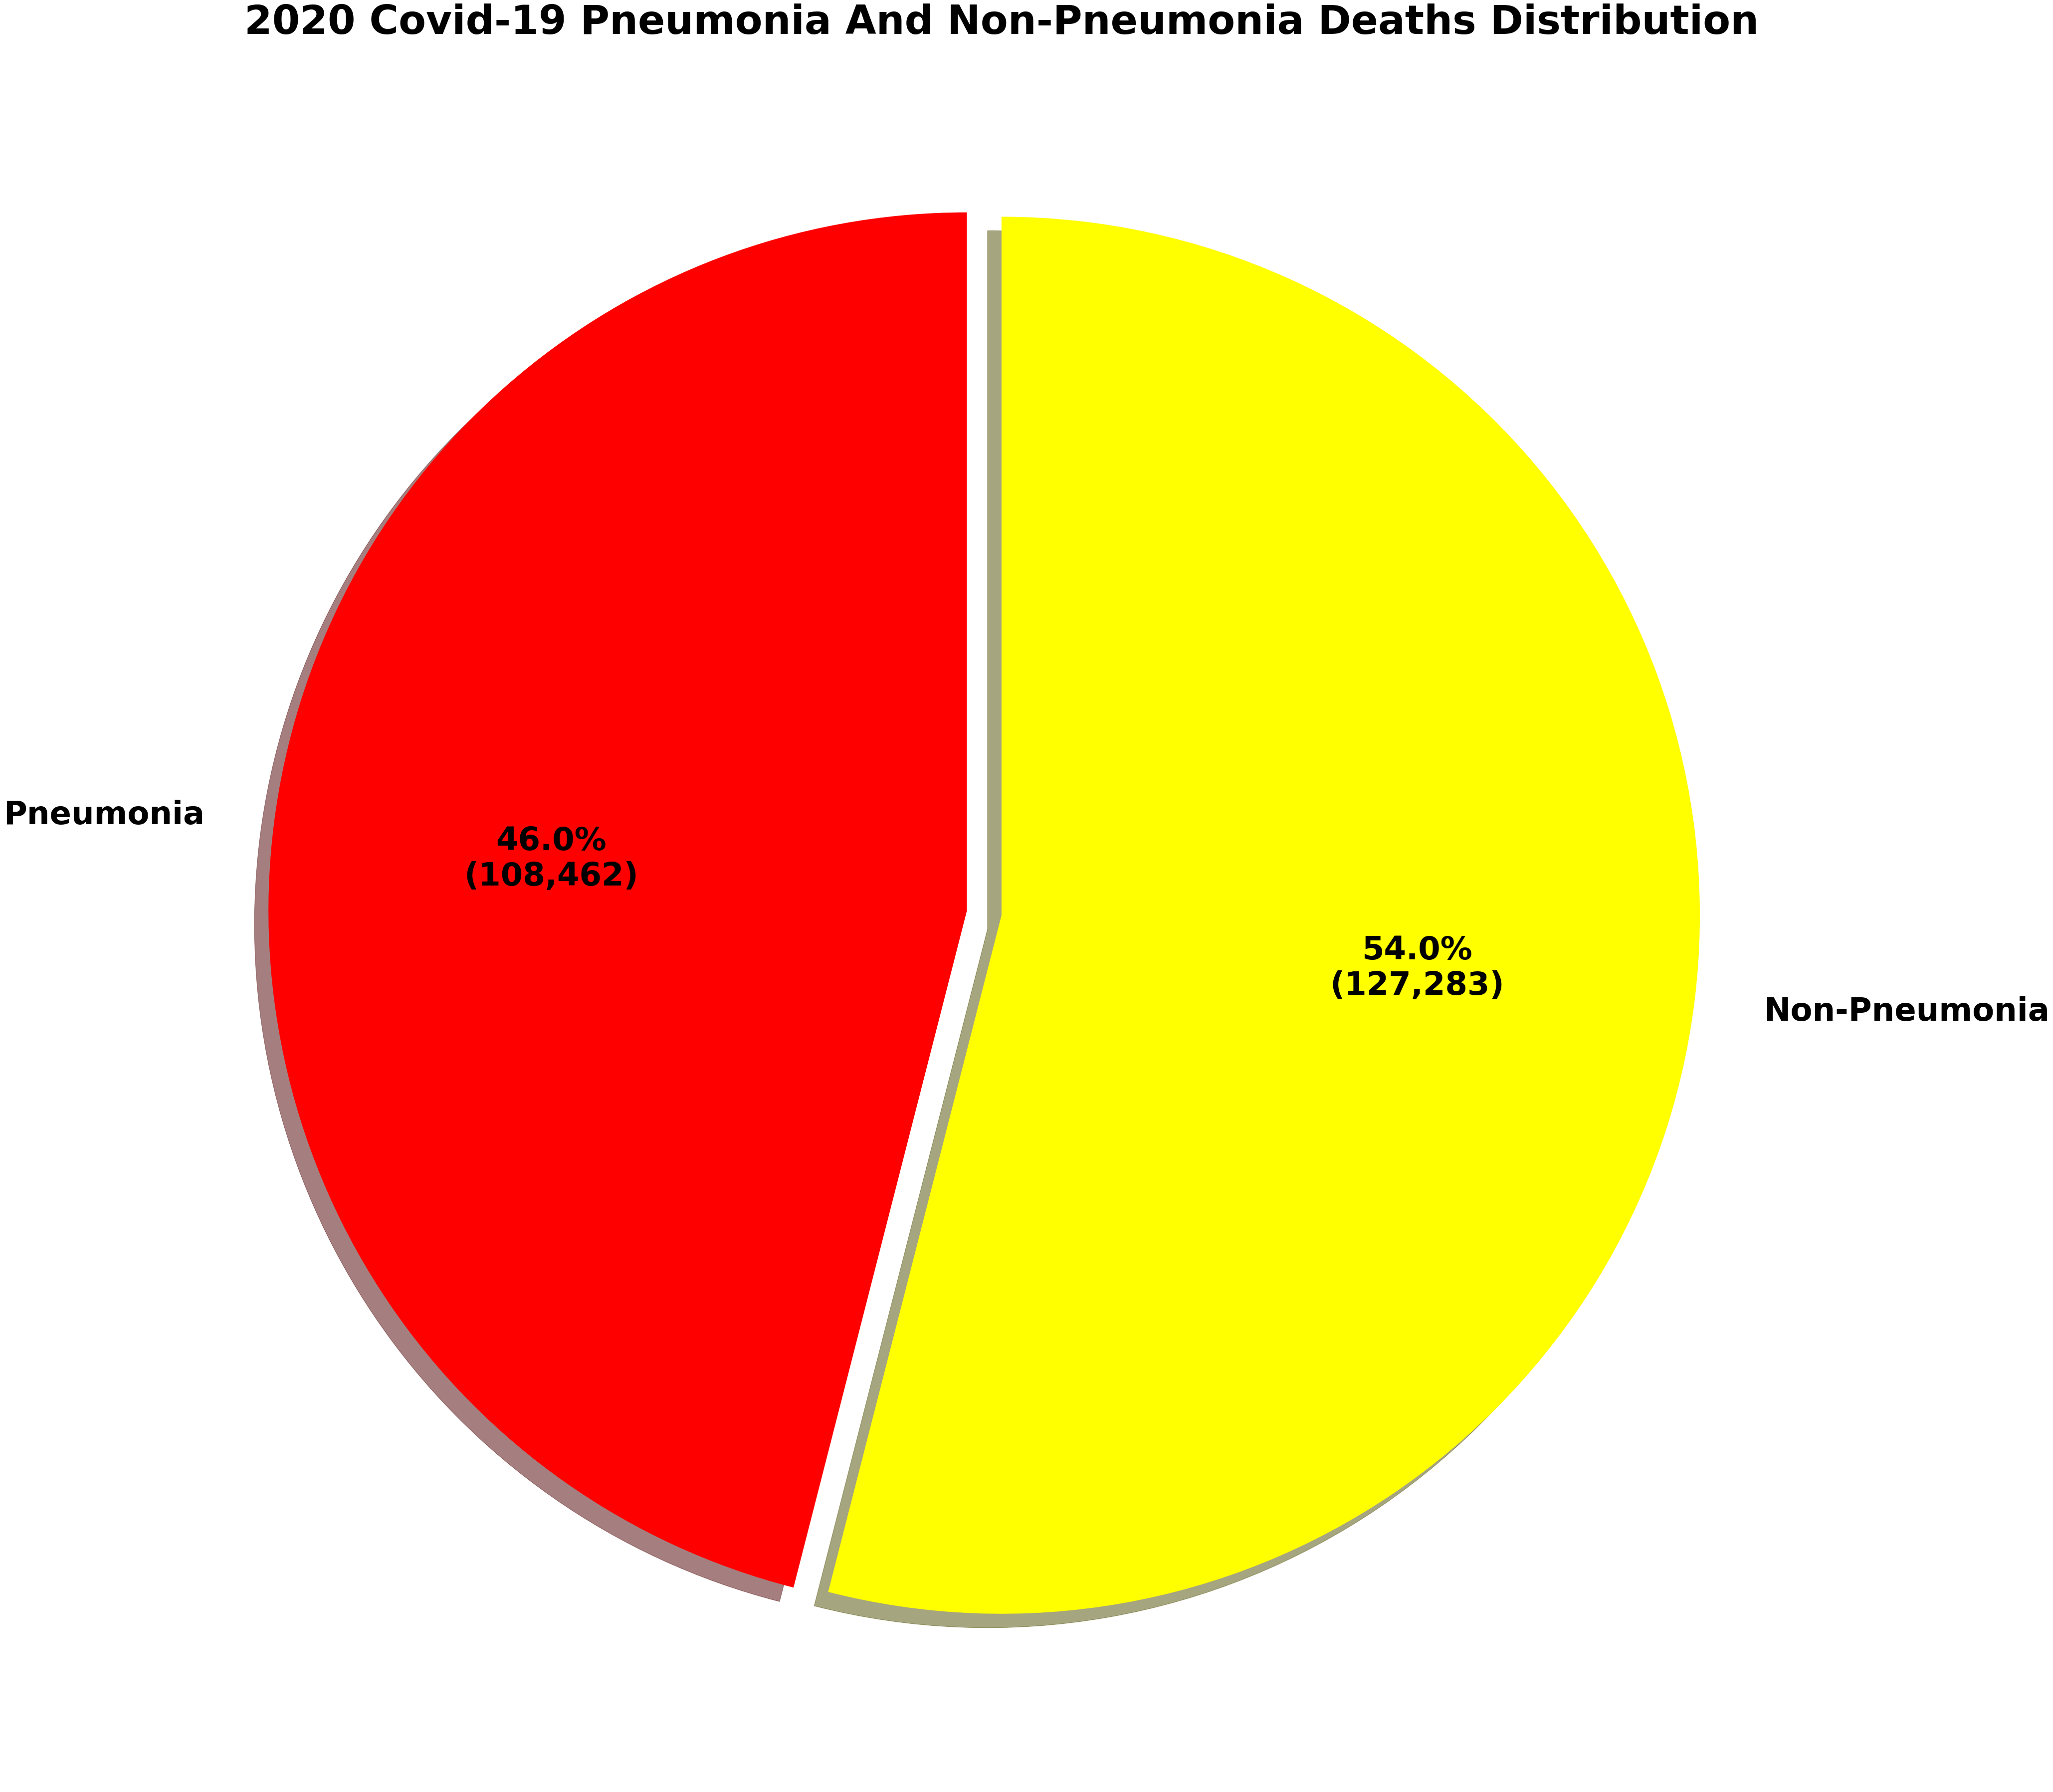

In [47]:
# Generate A Pie Plot Showing The Distribution Of Pneumonia And Non-Pneumonia Deaths For 2020 Covid-19
type = ["Pneumonia", "Non-Pneumonia"]
pneumonia = (data_2020['COVID-19_Pneumonia']).sum()
non_pneumonia = (data_2020['COVID-19_Other']).sum()
type_counts = [pneumonia, non_pneumonia]
colors = ["red", "yellow"]
explode = (0.05, 0)
plt.pie(type_counts, explode=explode, labels=type, colors=colors, autopct=lambda p : '{:.1f}%\n({:,.0f})'.format(p,p * sum(type_counts)/100), shadow=True, startangle=90, textprops={'fontsize': 64, 'weight':'bold'})
plt.title("2020 Covid-19 Pneumonia And Non-Pneumonia Deaths Distribution", fontsize=80, fontweight='bold')

plt.tight_layout()

# Save Plot As .png File
plt.savefig("Covid-19 Deaths Distribution.png")

# Show The Chart
plt.show()